###Abstract

This comprehensive study attempts to explore the impacts of various health and lifestyle predictors on sleep quality through using advanced machine learning techniques. Leveraging a rich dataset that includes variables such as Age, Sleep Duration, Physical Activity Level, Stress Level, Heart Rate, Daily Steps, Gender, Occupation, and BMI Category, the research aims to deploy and compare several predictive models, including Logistic Regression, Decision Tree Classifier, Random Forest, and H2O's Automated Machine Learning (AML). These models were meticulously chosen for their diverse capabilities in capturing the intricate patterns and relationships inherent in multi-class classification problems related to sleep quality.

The primary motivation behind this work is to provide a nuanced understanding of how different lifestyle and health-related factors contribute to the quality of sleep, with a special focus on identifying the most significant predictors. By employing a variety of modeling techniques, the study not only seeks to predict sleep quality with high accuracy but also to unveil the relative importance and predictive power of each factor across different models.

Findings from this study are expected to provide crucial insights into the factors that influence sleep quality, thereby aiding both individuals and healthcare professionals in devising targeted interventions to improve sleep health. Additionally, this research delves into the adaptability and efficacy of various predictive models, exploring how they can be fine-tuned to meet specific research requirements. This process not only sheds light on the predictability and interpretability of each model but also underscores the significant role of machine learning in health and lifestyle research.

This study shows how we can use machine learning to solve real-world problems by making the most of the data we have. It demonstrates the power of these technologies to understand and address complex health issues, paving the way for better public health solutions and personal health strategies.

##Q1 - What is the question?

**The central question of our study revolves around understanding the impact of various lifestyle and health-related factors on the quality of sleep among individuals. **

*How does factors like age, gender, occupation, stress level, physical activity, BMI affect an individuals Quality of Sleep?*

The dataset contains detailed information on several variables for each participant, including:

**Demographics:**

Age and Gender

**Occupation:**
A diverse range of occupations, suggesting varied daily routines and stress levels

**Sleep Metrics:**
Duration and quality of sleep, offering direct measures of sleep health

####Lifestyle Factors

**Physical Activity Level:**
Quantified on a scale, providing insight into daily physical engagement
**Stress Level:**
Self-reported, indicating the perceived psychological stress
**Daily Steps:**
A proxy for overall daily activity

###Health Indicators

**BMI Category:**
Indicates body weight relative to height, categorized as Normal, Overweight, or Obese

###Blood Pressure and Heart Rate: Key cardiovascular health metrics

**Sleep Disorder:**
Noting any diagnosed sleep disorders such as Insomnia or Sleep Apnea
With a sample size of 374 individuals, the dataset presents a comprehensive view of factors that potentially influence sleep quality.

The age of participants ranges from 27 to 59 years, with an almost equal distribution across the sleep quality scale from 4 (poor) to 9 (excellent), indicating a diverse sample. The average sleep duration reported is approximately 7.13 hours, with an average quality rating of 7.31 on a 10-point scale. Physical activity levels and daily steps vary widely among participants, providing a rich basis for exploring their relationships with sleep quality. Stress levels, heart rate, and the presence of sleep disorders are also critical variables that could significantly impact the analysis.

This dataset allows for an analysis of how age, lifestyle, and health indicators correlate with and possibly predict the quality of sleep. By analyzing these factors, the study aims to uncover actionable insights that could help individuals improve their sleep quality, enhancing overall well-being and health.

In [ ]:
# installing dependencies
#!pip install eli5
%matplotlib inline
import pandas as pd #library for data analysis
import numpy as np #numerical python library to perform scientific calculations
import seaborn as sns #library for statistical plotting
import matplotlib.pyplot as plt
import math #to perform math functions

StressandSleep = pd.read_csv('stress.csv') #read the data file
StressandSleep.head(10) #display the first 10 enteries of the dataset to check the column enteries and names

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


##Q2 - What did you do?

In the pursuit of understanding the intricate relationships between lifestyle, health factors, and sleep quality, our initial step involved the meticulous preprocessing of the dataset to ensure its readiness for complex analysis and modeling. This critical phase encompassed a series of targeted actions aimed at enhancing the dataset's integrity, usability, and relevance to our predictive modeling efforts.

###Data Preprocessing

First data type not equal to object is identified and then data_types includes the column for which the condition is true. This results in subset of columns with numerical columns.

Similarly for categorical columns boolean mask of data_types is equal to object is compared resulting in categorical columns.

Index is used to extract the column names and assign it to the variables accordingly.

In [ ]:
# Find the data types of each column
data_types = StressandSleep.dtypes

# Separate columns into numerical and categorical. .
numerical_columns = data_types[data_types != 'object'].index
categorical_columns = data_types[data_types == 'object'].index

# Display the number of numerical and categorical columns
print(f"Number of Numerical Columns: {len(numerical_columns)}")
print(f"Number of Categorical Columns: {len(categorical_columns)}")

# Display the list of numerical and categorical columns
print("\nNumerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Number of Numerical Columns: 8
Number of Categorical Columns: 5

Numerical Columns:
Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')

Categorical Columns:
Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object')


####Understanding our data


In [ ]:
StressandSleep.info() #Understand the dataset that we re working with-provides info0rmation about the dataframe such as data types of each column, number of null values and the memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
null_values = StressandSleep.isnull().sum() #check for null values
print("Null Values in each column:\n", null_values) #Displaying the result

Null Values in each column:
 Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


####Data Cleaning
Sleep Disorder is a categorical variable as it represents distinct classes such as "None," "Insomnia," or "Sleep Apnea." Categorizing sleep disorders is based on qualitative distinctions, making it inappropriate to impute missing values using mode imputation, which relies on the most frequent category. Imputing sleep disorder based on mode would oversimplify the complexity of sleep conditions, potentially leading to inaccurate representations of individuals' actual sleep-related challenges. Hence removing sleep disorder column from our dataset.

In [ ]:
df1=StressandSleep.drop(columns=['Sleep Disorder'])
df1.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps'],
      dtype='object')

"Person ID" is typically not relevant as a predictive feature for modeling tasks like predicting the "Quality of Sleep." The reason is that "Person ID" is an identifier variable, which means it is used to uniquely identify each individual in your dataset. It does not carry intrinsic predictive information about the outcome variable (in this case, "Quality of Sleep") because it does not describe any characteristic or behavior of the individuals that could be directly linked to how well they sleep. Including Person ID in our model can lead to issues such as:

**Overfitting:** The model might learn to associate specific IDs with the outcomes rather than understanding the underlying patterns in the relevant predictors. This would hinder its ability to generalize to new, unseen data.

**No Predictive Value:** Since IDs are arbitrary assignments, they do not provide any meaningful information that could help in understanding or predicting sleep quality.

**Model Complexity:** Including irrelevant features increases the complexity of the model, which can negatively impact model performance and interpretability.

In [ ]:
df1=StressandSleep.drop(columns=['Person ID'])
df1.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

####Handling Missing Values

Being aware of missing values is a fundamental aspect of data exploration and preparation. It ensures that the subsequent analyses and modeling processes are based on reliable, complete, and representative data, leading to more accurate and trustworthy results. Missing values can be very crucious for several reasons such as:

**Data integrity:** data being inaccurate or biased

**Statistical validity:** incorrect estimations, std errors, pvalues impacting the reliability of the statistical tests

**Model Performance:** Most ML algorithms cannot handle missing values so we need to impute or remove missing values

####Imputation
Our dataset doesn't contain any null or missing values. To demonstrate imputation techniques, we will intentionally delete some data. Imputation methods are selected based on the data type of each column. For numeric columns of types float64 and int64, we employ either the mean or median for imputation. Meanwhile, for columns with object or categorical data, we utilize the mode for imputation. Imputation is crucial as it enables us to maintain data integrity and make the most of our dataset by filling in missing values, thus avoiding potential biases and inaccuracies in our analysis.

In [ ]:
# Assuming 'original_df' is your original DataFrame
original_df = pd.DataFrame(df1)

# Create a copy of the original DataFrame
imputed_df = original_df.copy()

# Impute missing values randomly based on mean, median, or mode
for column in imputed_df.columns:
    # Generate random indices for missing values
    random_indices = imputed_df[column].isnull()

    # Impute based on mean, median, or mode
    if imputed_df[column].dtype == 'float64':
        imputed_values = imputed_df[column].mean()
    elif imputed_df[column].dtype == 'int64':
        imputed_values = imputed_df[column].median()
    else:
        imputed_values = imputed_df[column].mode().iloc[0]

    # Replace missing values with imputed values
    imputed_df.loc[random_indices, column] = imputed_values

# Display the original and imputed DataFrames
print("Original DataFrame:")
print(original_df)
print("\nImputed DataFrame:")
print(imputed_df)

Original DataFrame:
     Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0      Male   27     Software Engineer             6.1                 6   
1      Male   28                Doctor             6.2                 6   
2      Male   28                Doctor             6.2                 6   
3      Male   28  Sales Representative             5.9                 4   
4      Male   28  Sales Representative             5.9                 4   
..      ...  ...                   ...             ...               ...   
369  Female   59                 Nurse             8.1                 9   
370  Female   59                 Nurse             8.0                 9   
371  Female   59                 Nurse             8.1                 9   
372  Female   59                 Nurse             8.1                 9   
373  Female   59                 Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category Blood Press

In [ ]:
imputed_df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [ ]:
df2=imputed_df
df2.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


####Handling Categorical Data

In [ ]:
#Checking for unique varibales in categorical columns
print(df2.dtypes)

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [ ]:
# Identify categorical columns (usually of type 'object' or 'category')
categorical_columns = df2.select_dtypes(include=['object', 'category']).columns

print("Categorical columns in the dataset are:", list(categorical_columns))

Categorical columns in the dataset are: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


In [ ]:
df2['Gender'].value_counts() #used to count the occurrences of unique values in the 'Gender' column
#value_counts() method is then applied to the 'Gender' column to count the occurrences of each unique value in that column.

Male      189
Female    185
Name: Gender, dtype: int64

In [ ]:
df2['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [ ]:
df2['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [ ]:
df2['Blood Pressure'].unique()


array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [ ]:
df2 = pd.concat([df2, df2['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df2

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,0,1
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [ ]:
df2= df2.rename(columns={0: 'BloodPressure_Upper_Value', 1: 'BloodPressure_Lower_Value'})
df2.head(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


####Distribution of Numerical Variables

i) Understanding the distribution of numeric variables is crucial for analyzing and modeling data effectively. It helps in grasping the nature of the data, ensuring models are accurate by meeting their assumptions about how data should be distributed.
ii) Visualizing this distribution makes it easier to communicate findings and make decisions about the data, such as which statistical tests to use or how to engineer features properly. It also guides in preprocessing steps like handling outliers or scaling data.
iii) Ultimately, knowing the distribution aids in choosing the right algorithms and adjusting their settings, especially when dealing with uneven data.

Simply put, a good understanding of data distribution sets the stage for making informed, effective decisions throughout the data analysis process.

In [ ]:
numeric_columns = df2.select_dtypes(include=['number']).columns

print("Numeric columns in df2:", list(numeric_columns))

Numeric columns in df2: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']


Descriptive statistics for Age:
count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64


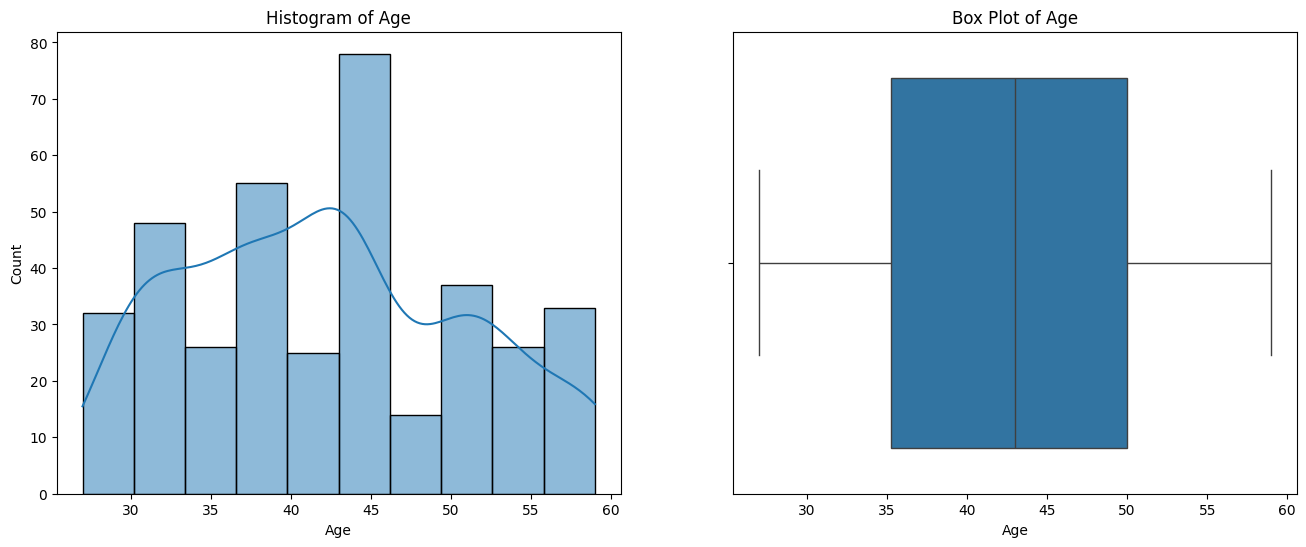

Shapiro-Wilk Test for Age: Statistic=0.9580035209655762, P-value=7.4213430956149296e-09

Descriptive statistics for Sleep Duration:
count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64


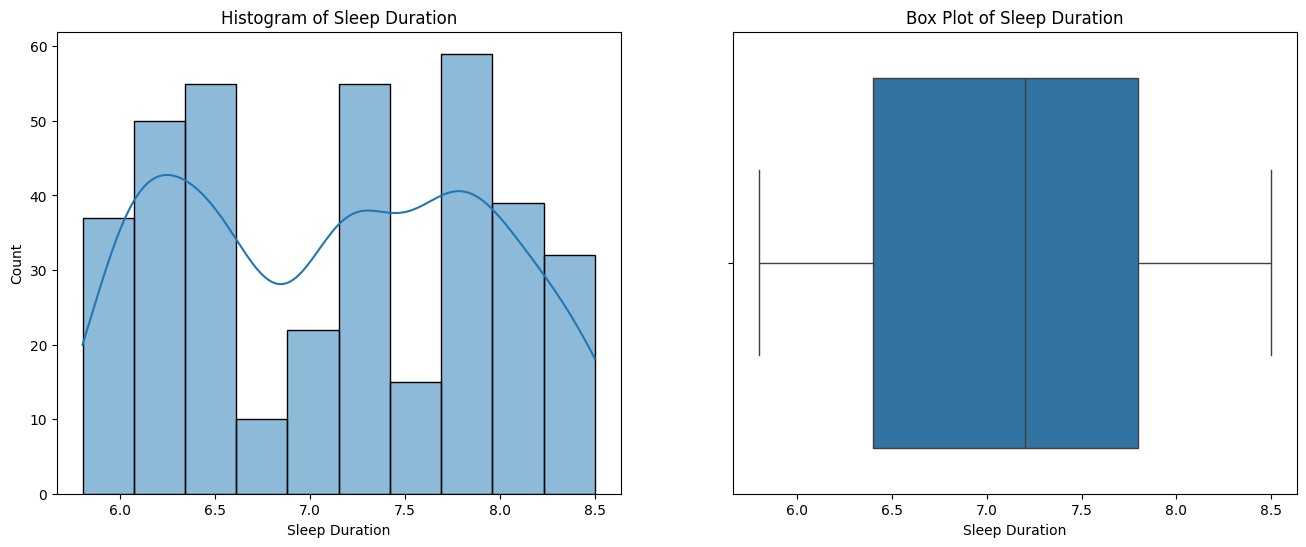

Shapiro-Wilk Test for Sleep Duration: Statistic=0.9357648491859436, P-value=1.2668722841613356e-11

Descriptive statistics for Quality of Sleep:
count    374.000000
mean       7.312834
std        1.196956
min        4.000000
25%        6.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Quality of Sleep, dtype: float64


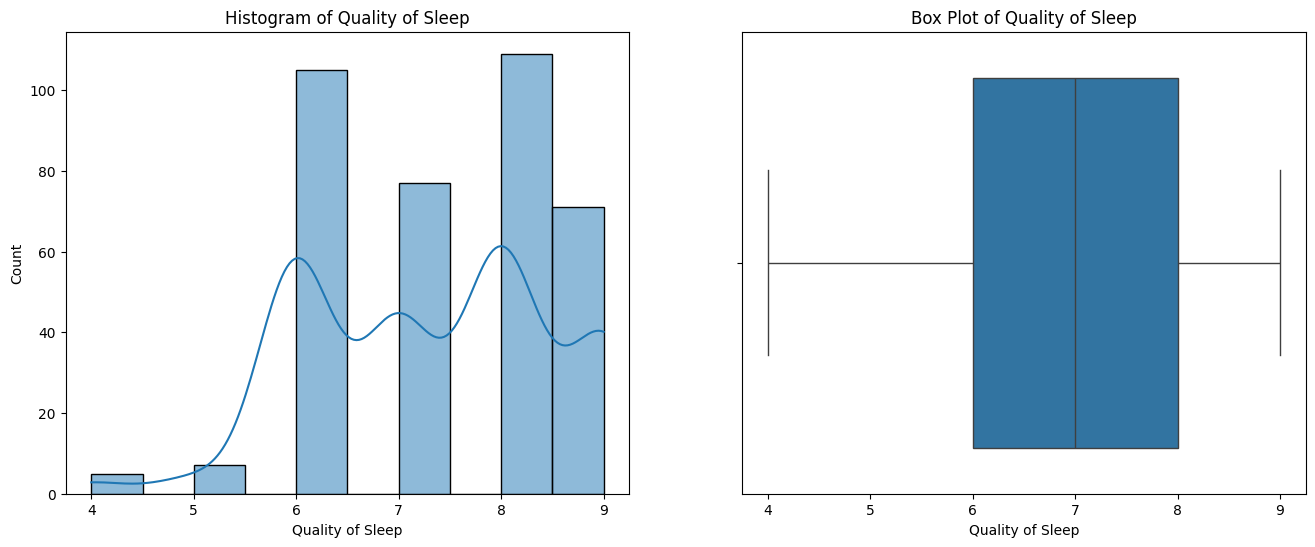

Shapiro-Wilk Test for Quality of Sleep: Statistic=0.8938649892807007, P-value=1.882131560996289e-15

Descriptive statistics for Physical Activity Level:
count    374.000000
mean      59.171123
std       20.830804
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64


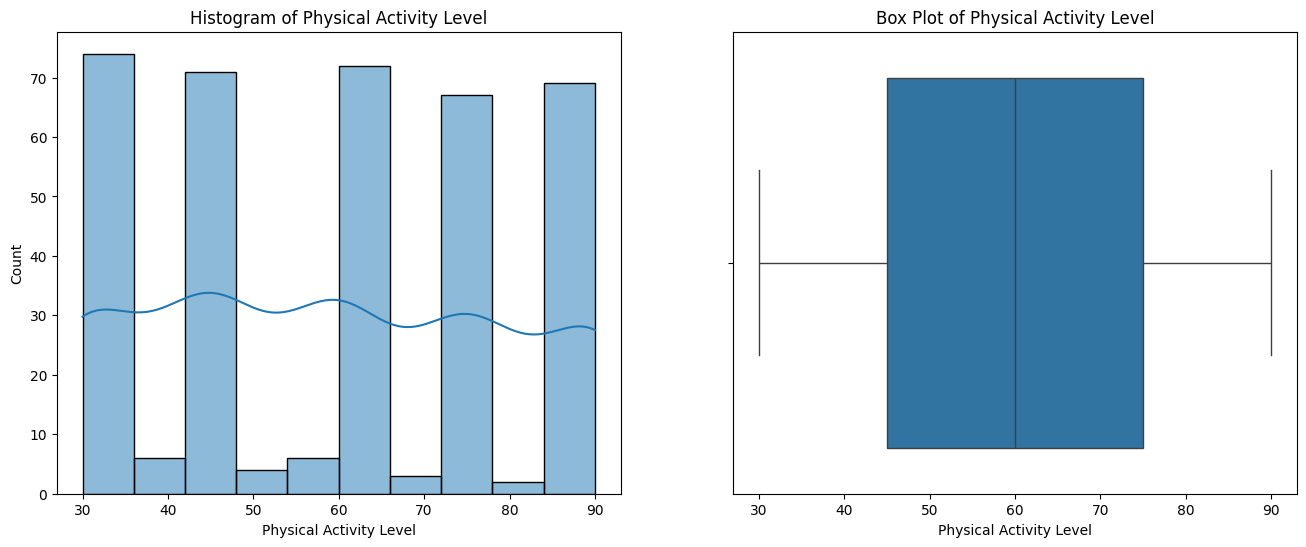

Shapiro-Wilk Test for Physical Activity Level: Statistic=0.8994297385215759, P-value=5.178644243031966e-15

Descriptive statistics for Stress Level:
count    374.000000
mean       5.385027
std        1.774526
min        3.000000
25%        4.000000
50%        5.000000
75%        7.000000
max        8.000000
Name: Stress Level, dtype: float64


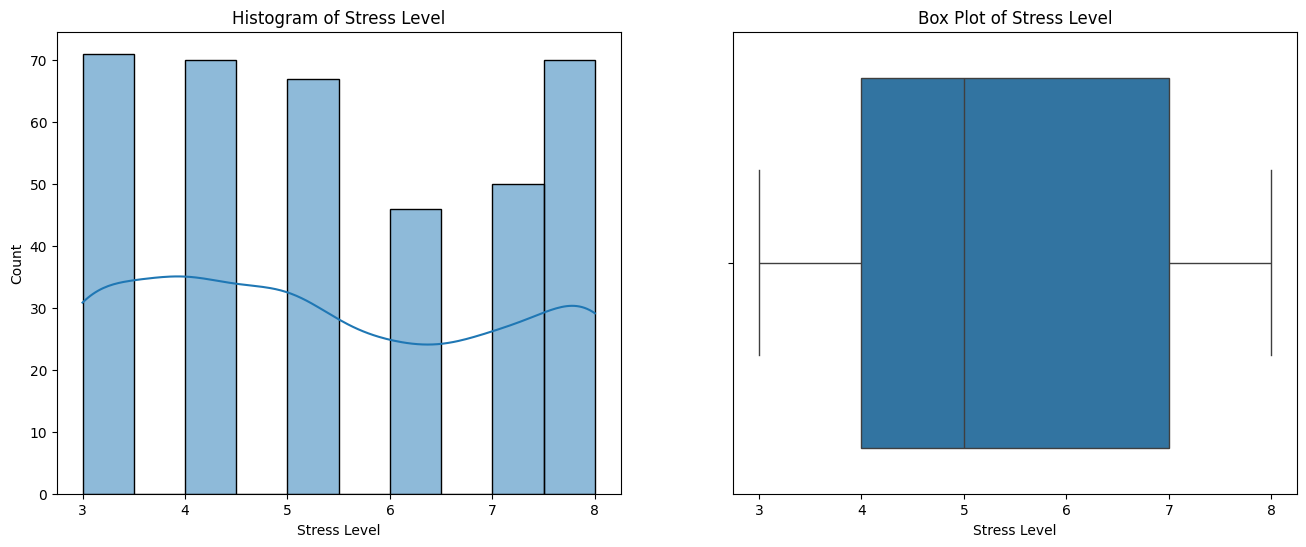

Shapiro-Wilk Test for Stress Level: Statistic=0.8908881545066833, P-value=1.1121582831513958e-15

Descriptive statistics for Heart Rate:
count    374.000000
mean      70.165775
std        4.135676
min       65.000000
25%       68.000000
50%       70.000000
75%       72.000000
max       86.000000
Name: Heart Rate, dtype: float64


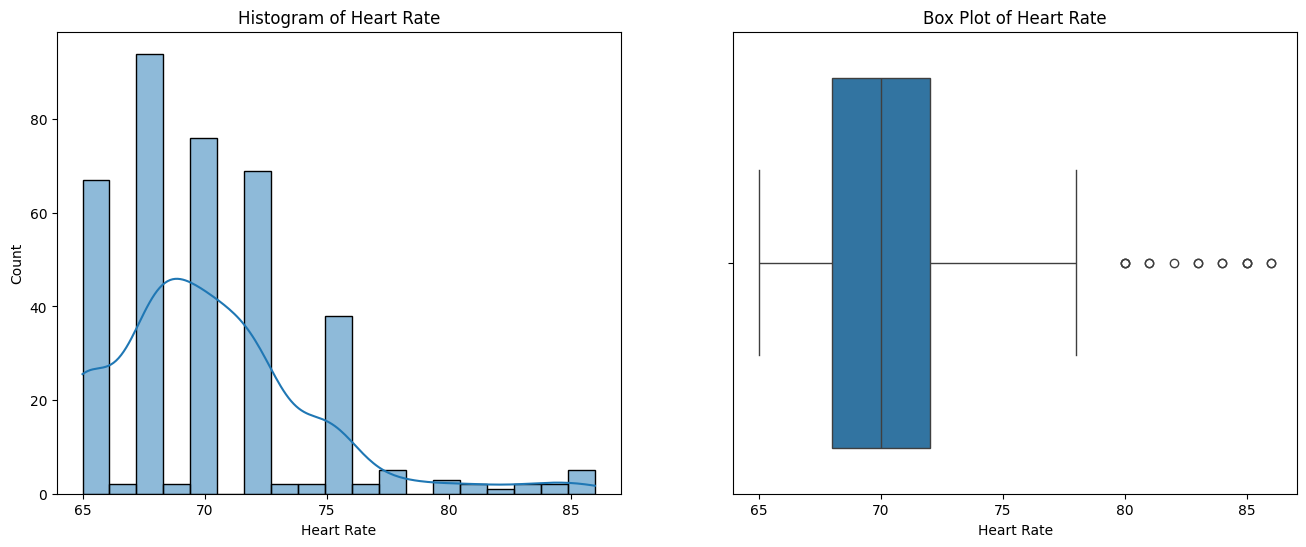

Shapiro-Wilk Test for Heart Rate: Statistic=0.882550060749054, P-value=2.684890096097607e-16

Descriptive statistics for Daily Steps:
count      374.000000
mean      6816.844920
std       1617.915679
min       3000.000000
25%       5600.000000
50%       7000.000000
75%       8000.000000
max      10000.000000
Name: Daily Steps, dtype: float64


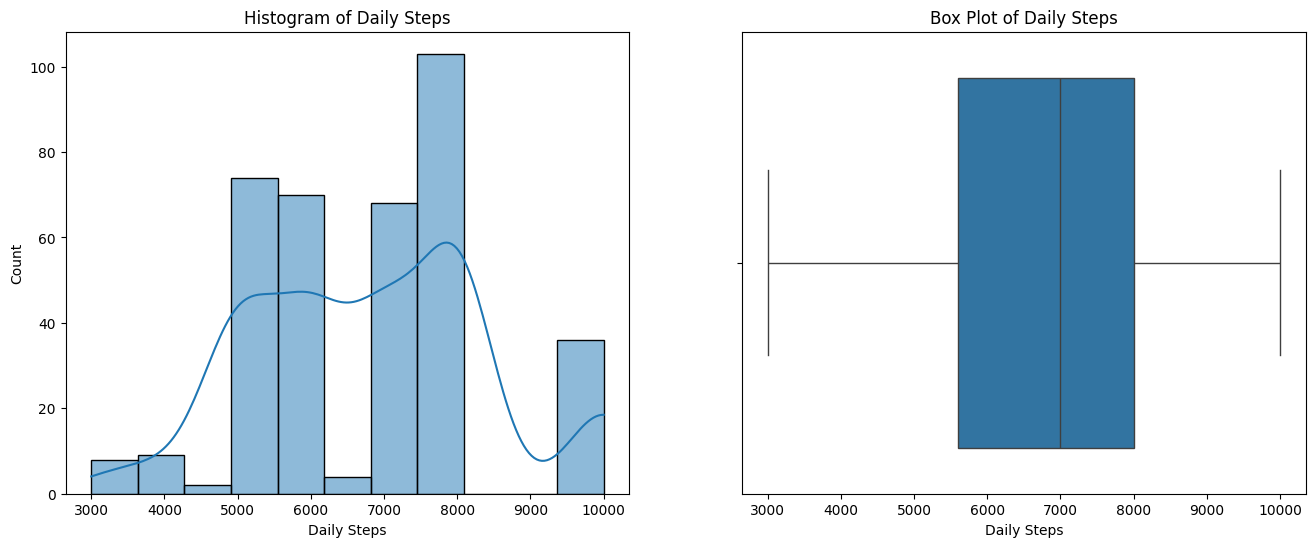

Shapiro-Wilk Test for Daily Steps: Statistic=0.9368199110031128, P-value=1.6545596490114e-11



In [ ]:
from scipy import stats

# Assuming df2 is your DataFrame
numeric_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

for col in numeric_columns:
    print(f"Descriptive statistics for {col}:")
    print(df2[col].describe())

    # Create a figure with two subplots (side by side)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Adjust the overall size of the figure as needed

    # Histogram on the first subplot
    sns.histplot(df2[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')

    # Box plot on the second subplot
    sns.boxplot(x=df2[col], ax=axes[1])
    axes[1].set_title(f'Box Plot of {col}')

    plt.show() # Display the plots

    # Shapiro-Wilk Test for normality (best for sample sizes < 5000)
    if df2[col].notna().sum() < 5000: # Check if the number of non-NaN values is less than 5000
        shapiro_test = stats.shapiro(df2[col].dropna())
        print(f"Shapiro-Wilk Test for {col}: Statistic={shapiro_test.statistic}, P-value={shapiro_test.pvalue}\n")
    else:
        print(f"Shapiro-Wilk test may not be accurate for {col} due to large sample size. Consider using visual inspection or other normality tests.\n")


####Removing Outliers

**Outliers Removal Using Z-Score Method:**

Outliers are typically identified as observations that lie a certain number of standard deviations away from the mean. In situations where outliers are evident in a boxplot, addressing them appropriately is crucial, taking into account both the analysis objectives and the data characteristics.

For the Heart Rate data, I began by calculating the mean and standard deviation to understand its central tendency and variability. Subsequently, I established lower and upper thresholds for detecting outliers, setting these limits at plus or minus 2 standard deviations from the mean. Observations outside these boundaries were flagged as potential outliers.

To address this, I created a new DataFrame that includes only those observations where the 'Heart Rate' values are within the predefined limits, effectively excluding the outliers.

Lower Bound : 61.8944243308451
Upper Bound : 78.43712647129395


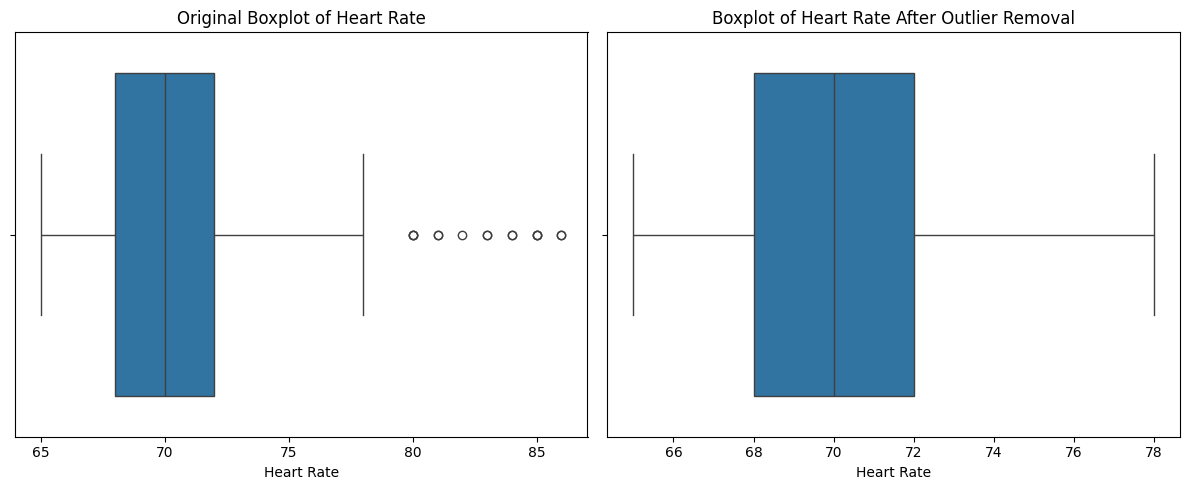

In [ ]:
# Original Boxplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df2['Heart Rate'])
plt.title('Original Boxplot of Heart Rate')

# Calculate summary statistics
mean = df2['Heart Rate'].mean()
std = df2['Heart Rate'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std * 2
upper_bound = mean + std * 2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df2_cleaned = df2[(df2['Heart Rate'] >= lower_bound) & (df2['Heart Rate'] <= upper_bound)]

# Boxplot after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df2_cleaned['Heart Rate'])
plt.title('Boxplot of Heart Rate After Outlier Removal')

plt.tight_layout()
plt.show()

####Encoding Categorical Variables



In [ ]:
# Perform one-hot encoding using pandas get_dummies
df2_encoded = pd.get_dummies(df2_cleaned, columns=['Gender', 'Occupation', 'BMI Category'])

# Display the first few rows of the encoded DataFrame
print(df2_encoded.head())

   Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0   27             6.1                 6                       42   
1   28             6.2                 6                       60   
2   28             6.2                 6                       60   
7   29             7.8                 7                       75   
8   29             7.8                 7                       75   

   Stress Level  Heart Rate  Daily Steps Sleep Disorder  \
0             6          77         4200           None   
1             8          75        10000           None   
2             8          75        10000           None   
7             6          70         8000           None   
8             6          70         8000           None   

  BloodPressure_Upper_Value BloodPressure_Lower_Value  ...  Occupation_Lawyer  \
0                       126                        83  ...                  0   
1                       125                        80  ...          

In [ ]:
#creating and storing the cleaned dataset so it can be used for further modelling.
df3=df2_encoded
df3.to_csv('QualityofSleep_cleaned.csv', index=False)
df3.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Overweight
0,27,6.1,6,42,6,77,4200,None,126,83,...,0,0,0,0,0,1,0,0,0,1
1,28,6.2,6,60,8,75,10000,None,125,80,...,0,0,0,0,0,0,0,1,0,0
2,28,6.2,6,60,8,75,10000,None,125,80,...,0,0,0,0,0,0,0,1,0,0
7,29,7.8,7,75,6,70,8000,None,120,80,...,0,0,0,0,0,0,0,1,0,0
8,29,7.8,7,75,6,70,8000,None,120,80,...,0,0,0,0,0,0,0,1,0,0


###Feature Engineering

####Feature Selection

**Importance Evaluation:** Feature selection often involves evaluating the importance of different predictor variables. The independent variables that are highly useful to predict target variables can be predicted by different methods.

####Correlation

Calculate the correlation coefficients between each independent variable and the target variable. Higher absolute values of correlation indicate stronger relationships. Positive correlation signifies a positive impact, while negative correlation implies a negative impact on the target variable.

In [ ]:
df3.corr()

<ipython-input-280-cf5c64484bf6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Female,Gender_Male,Occupation_Accountant,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Overweight
Age,1.000000,0.315749,0.439260,0.142077,-0.397676,-0.193177,0.003712,0.627738,-0.627738,-0.110683,...,-0.126518,0.015804,0.577935,0.040106,-0.082084,-0.107791,-0.015336,-0.500573,-0.084149,0.546573
Sleep Duration,0.315749,1.000000,0.889815,0.174076,-0.801368,-0.612842,-0.086963,0.131019,-0.131019,-0.015480,...,0.125350,-0.016701,-0.044450,-0.295645,-0.089987,-0.013511,-0.198715,0.337225,0.081250,-0.379420
Quality of Sleep,0.439260,0.889815,1.000000,0.127943,-0.908132,-0.721403,-0.093540,0.323473,-0.323473,0.155454,...,0.187555,-0.017669,0.026738,-0.382685,-0.091563,-0.003486,-0.116709,0.276758,0.064763,-0.310512
Physical Activity Level,0.142077,0.174076,0.127943,1.000000,0.012020,0.256545,0.820730,0.002468,-0.002468,-0.024329,...,0.205769,-0.011702,0.479931,-0.219869,-0.034590,-0.024745,-0.232441,-0.100091,0.032718,0.086683
Stress Level,-0.397676,-0.801368,-0.908132,0.012020,1.000000,0.823647,0.249656,-0.418940,0.418940,-0.144790,...,-0.060406,-0.010430,0.044705,0.292880,0.027652,-0.000773,-0.175444,-0.135961,-0.046653,0.159313
Heart Rate,-0.193177,-0.612842,-0.721403,0.256545,0.823647,1.000000,0.318414,-0.218090,0.218090,-0.080331,...,-0.073858,0.087966,0.330087,0.229816,0.147773,0.076923,-0.301143,-0.304592,0.054133,0.284520
Daily Steps,0.003712,-0.086963,-0.093540,0.820730,0.249656,0.318414,1.000000,-0.023853,0.023853,-0.014548,...,0.227772,-0.050550,0.402613,-0.195742,-0.071589,-0.012911,-0.213707,-0.042398,0.017503,0.035056
Gender_Female,0.627738,0.131019,0.323473,0.002468,-0.418940,-0.218090,-0.023853,1.000000,-1.000000,0.319713,...,-0.362797,0.052705,0.495135,-0.313697,0.074640,-0.092055,0.276523,-0.377697,0.061551,0.355351
Gender_Male,-0.627738,-0.131019,-0.323473,-0.002468,0.418940,0.218090,0.023853,-1.000000,1.000000,-0.319713,...,0.362797,-0.052705,-0.495135,0.313697,-0.074640,0.092055,-0.276523,0.377697,-0.061551,-0.355351
Occupation_Accountant,-0.110683,-0.015480,0.155454,-0.024329,-0.144790,-0.080331,-0.014548,0.319713,-0.319713,1.000000,...,-0.128326,-0.017916,-0.168308,-0.106041,-0.025372,-0.031118,-0.118340,0.108558,0.124474,-0.167002


<ipython-input-281-1868d0e37f39>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(), annot=True, cmap="coolwarm")


<Axes: >

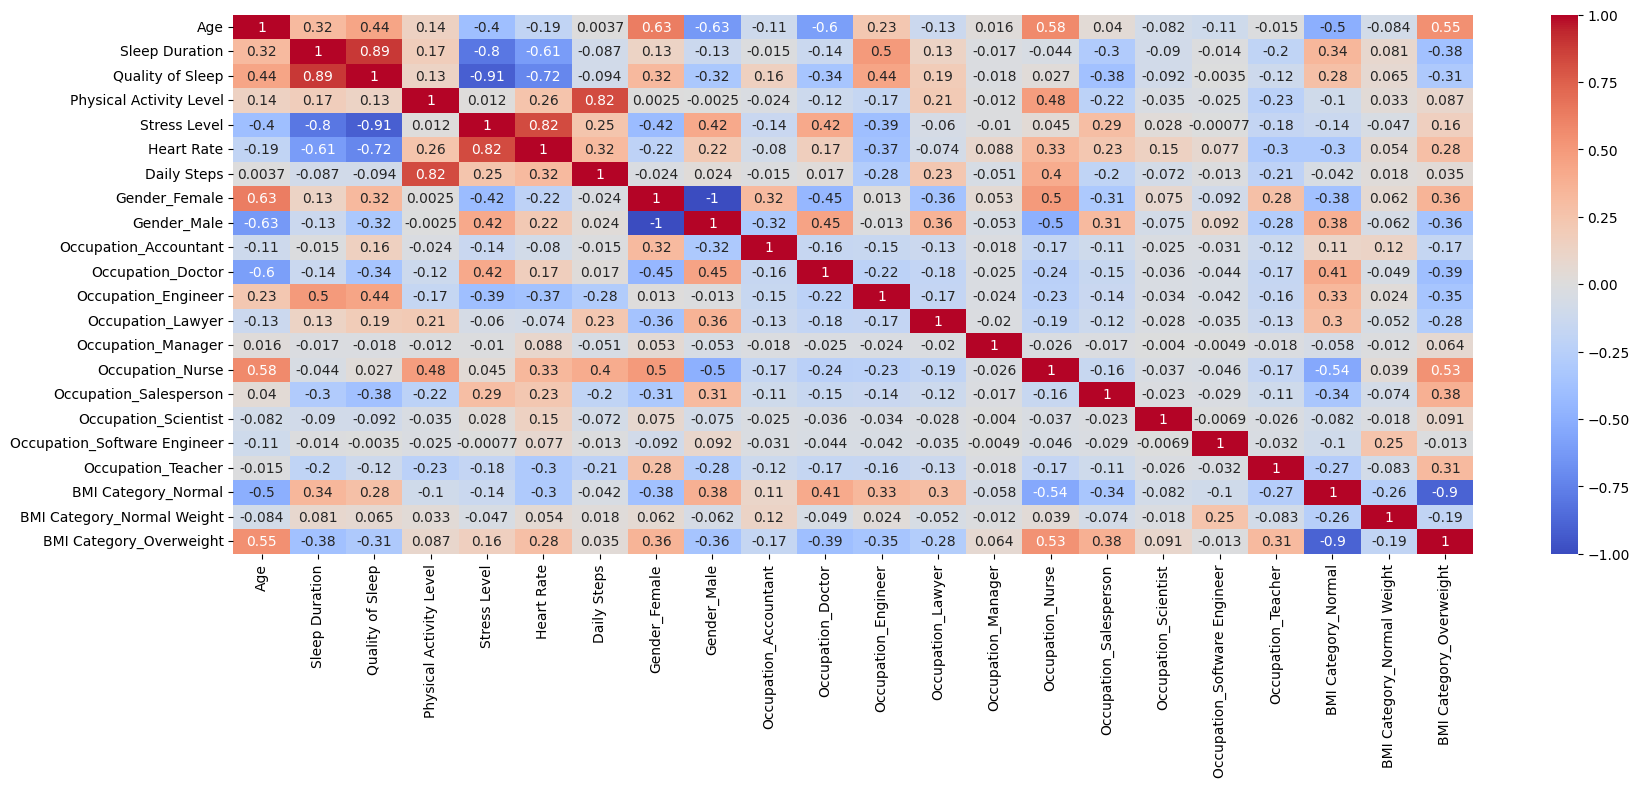

In [ ]:
# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(df3.corr(), annot=True, cmap="coolwarm")

By understanding which variables are most strongly correlated with the target variable, we can prioritize these variables in our predictive models.
Features with very low correlation might be candidates for removal as they might not contribute much to the model's predictive power.

In [ ]:
# Calculate the correlation of "Quality of Sleep" with other predictor variables
correlation_with_quality_of_sleep = df3.corr()['Quality of Sleep'].drop('Quality of Sleep')

# Display the correlation values
print("Correlation with Quality of Sleep:")
print(correlation_with_quality_of_sleep)

Correlation with Quality of Sleep:
Age                             0.439260
Sleep Duration                  0.889815
Physical Activity Level         0.127943
Stress Level                   -0.908132
Heart Rate                     -0.721403
Daily Steps                    -0.093540
Gender_Female                   0.323473
Gender_Male                    -0.323473
Occupation_Accountant           0.155454
Occupation_Doctor              -0.344459
Occupation_Engineer             0.443432
Occupation_Lawyer               0.187555
Occupation_Manager             -0.017669
Occupation_Nurse                0.026738
Occupation_Salesperson         -0.382685
Occupation_Scientist           -0.091563
Occupation_Software Engineer   -0.003486
Occupation_Teacher             -0.116709
BMI Category_Normal             0.276758
BMI Category_Normal Weight      0.064763
BMI Category_Overweight        -0.310512
Name: Quality of Sleep, dtype: float64


<ipython-input-282-d519040e56a0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_quality_of_sleep = df3.corr()['Quality of Sleep'].drop('Quality of Sleep')


####Understanding the Correlation Coefficients

Values closer to 1 indicate a strong positive linear relationship. As the predictor variable increases, "Quality of Sleep" also tends to increase.

Values closer to -1 indicate a strong negative linear relationship. As the predictor variable increases, "Quality of Sleep" tends to decrease.

Values around 0 indicate a weak or no linear relationship.

Here's how to interpret some of the key outputs:

**Sleep Duration (0.889815):** This shows a very strong positive correlation with "Quality of Sleep," suggesting that longer sleep durations are closely associated with better quality of sleep. This is one of the most predictive variables for sleep quality in your dataset

**Stress Level (-0.908132):** Indicates a very strong negative correlation with "Quality of Sleep." This suggests that higher stress levels are closely associated with worse sleep quality, making it another crucial variable for predicting sleep quality

**Heart Rate (-0.721403):** Shows a strong negative correlation, indicating that higher heart rates may be associated with poorer sleep quality

**Age (0.439260):** Indicates a moderate positive correlation. This could suggest that sleep quality tends to be perceived as better among older individuals in your dataset, but the relationship is not as strong as with "Sleep Duration" or "Stress Level."

**Gender_Female (0.323473) and Gender_Male (-0.323473):** These are dummy variables resulting from one-hot encoding the "Gender" variable. The positive correlation for females suggests that being female is moderately associated with better sleep quality, while the negative correlation for males suggests the opposite. The absolute values are the same because these variables are complements of each other (if one is 0, the other is 1, and vice versa).

####Regression

Overfitting is a common challenge in machine learning, where a model learns the training data too well, capturing noise and subtle fluctuations that do not generalize to new, unseen data. This issue is especially pertinent in scenarios involving small datasets, as the limited number of observations can lead the model to focus excessively on the specific details of the training set, rather than capturing the underlying patterns that are relevant for prediction.

Ridge Regression introduces a regularization term to the cost function, penalizing large coefficients in the model.

Ridge Regression effectively reduces the model's complexity, discouraging the learning of a model that is too complex for the data at hand.

The alpha parameter controls the strength of this regularization: a higher alpha increases the penalty, leading to simpler models, while a lower alpha reduces the penalty, allowing for more complexity.

In our case, setting alpha to 0.5 represents a balanced approach to regularization, aiming to mitigate overfitting without overly simplifying the model.

In [ ]:
from sklearn.model_selection import train_test_split

X = df3[['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level',
       'Heart Rate', 'Daily Steps', 'Gender_Female', 'Gender_Male', 'Occupation_Nurse',
       'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Teacher',
       'BMI Category_Normal', 'BMI Category_Normal Weight', 'BMI Category_Overweight']]

y = df3['Quality of Sleep']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import Ridge

# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

This regularization approach is particularly advantageous for small datasets for several reasons:

**Bias-Variance Trade-off:** Ridge Regression helps navigate the bias-variance trade-off by introducing a slight bias (through regularization) to significantly reduce variance in the model's predictions. This trade-off is crucial when data is limited, as it helps in building a model that generalizes better to unseen data

**Multicollinearity Handling:** Small datasets often suffer from multicollinearity, where predictors are highly correlated. Ridge Regression can handle these situations gracefully by distributing the coefficient weights among the correlated predictors, which helps in stabilizing the model estimates

**Dimensionality Reduction:** While not reducing the number of variables explicitly, Ridge Regression can shrink the coefficients of less important features effectively to zero, acting as a form of feature selection and further simplifying the model.

#Q3 - How well did it work?

###Data Modelling

####Logistic Regression

Given the "Quality of Sleep" variable is categorical with more than two outcomes, we can't use binary logistic regression directly. Instead, multinomial logistic regression, an extension of binary logistic regression, is suitable for handling multiple classes. This model provides a way to predict probabilities of the different possible outcomes of a categorically distributed dependent variable, given a set of independent variables.

**Model Fitting and Interpretation**

In fitting a multinomial logistic regression model to predict "Quality of Sleep", we estimate coefficients for each class relative to a baseline class. These coefficients indicate the change in the log odds of being in a given category versus the baseline category, for a one-unit increase in the predictor variable.

Through multinomial logistic regression, we can understand how different factors influence the "Quality of Sleep". By interpreting the coefficients, we gain insights into which factors are likely to improve or worsen sleep quality, guiding interventions or recommendations to enhance sleep health. This approach allows for a nuanced analysis of the predictors of "Quality of Sleep" across its various categories, providing a comprehensive view of the factors at play.

In [ ]:
pip install shap

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

# Create a pipeline that includes scaling and logistic regression model
logreg_pipeline = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000))

# Fit the model on the training data
logreg_pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

# Print the evaluation results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Accuracy: 0.9074074074074074

Confusion Matrix:
 [[25  1  1  0]
 [ 0 21  0  0]
 [ 0  6 30  0]
 [ 0  0  2 22]]

Classification Report:
               precision    recall  f1-score   support

           6       1.00      0.93      0.96        27
           7       0.75      1.00      0.86        21
           8       0.91      0.83      0.87        36
           9       1.00      0.92      0.96        24

    accuracy                           0.91       108
   macro avg       0.91      0.92      0.91       108
weighted avg       0.92      0.91      0.91       108



#####Accuracy
Accuracy: 0.907 or 90.74%
This is the proportion of correctly classified instances out of the total instances.
In your case, the model correctly classified approximately 90.74% of the instances.

#####Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.
Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class.
The diagonal elements represent the number of correctly classified instances for each class. Off-diagonal elements are misclassifications

#####Classification Report

**Precision:** The ability of the classifier not to label as positive a sample that is negative.
Precision = TP / (TP + FP), where TP is the number of true positives and FP is the number of false positives.

Class 6 has the highest precision (100%), indicating that when the model predicts class 6, it is usually correct.
Class 7 also has high precision (75%), while classes 8 and 9 have slightly lower precision (91% and 100% respectively).

**Recall:** The ability of the classifier to find all the positive samples. Recall = TP / (TP + FN), where FN is the number of false negatives.

**F1-Score:** The harmonic mean of precision and recall.

F1-Score = 2 * (Precision * Recall) / (Precision + Recall).

The weighted average of precision and recall. A higher F1-Score indicates better overall performance. In your case, the weighted average F1-Score is
0.91, which is quite good.

Class 7 has perfect recall (100%), indicating that the model correctly identifies all instances of class 7. Classes 6, 8, and 9 also have high recall, but class 8 has slightly lower recall (83%).

**Support:** The number of actual occurrences of the class in the specified dataset.

####Logistic Regression with Cross Validation

**Reduced Overfitting:** Cross-validation helps detect and mitigate overfitting by evaluating the model's performance on multiple subsets of the training data, leading to better generalization on unseen data.

**Optimized Hyperparameters:** Cross-validation allows tuning of hyperparameters, such as regularization strength or solver algorithm, resulting in better model performance compared to using default hyperparameter values.

**More Representative Evaluation:** Cross-validation provides a more representative evaluation of the model's performance by averaging results over multiple folds of the data, leading to a more stable and reliable estimate compared to a single train-test split.

**Robustness to Data Variability:** Cross-validation accounts for variability in the dataset by evaluating the model on different subsets of the data, mitigating sensitivity to specific training and testing data splits and providing more consistent performance evaluation.

In summary, using logistic regression with cross-validation enhances the model's ability to generalize to unseen data, reduces overfitting, optimizes hyperparameters, facilitates better model selection, and provides more reliable performance evaluation, ultimately leading to improved accuracy and more reliable predictions.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that includes scaling and logistic regression model
logreg_pipeline = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000))

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(logreg_pipeline, X_train, y_train, cv=5)

# Fit the model on the training data
logreg_pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

# Print the evaluation results
print("Cross-Validation Scores:", cv_scores)
print("\nMean CV Score:", np.mean(cv_scores))
print("\nStandard Deviation of CV Scores:", np.std(cv_scores))
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Cross-Validation Scores: [0.9137931  0.96551724 1.         0.92982456 0.96491228]

Mean CV Score: 0.9548094373865699

Standard Deviation of CV Scores: 0.030217528477170515

Accuracy: 0.9722222222222222

Confusion Matrix:
 [[ 1  1  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0 21  0]
 [ 0  0  0  1 19]]

Classification Report:
               precision    recall  f1-score   support

           5       1.00      0.50      0.67         2
           6       0.95      1.00      0.97        18
           7       1.00      1.00      1.00        11
           8       0.95      1.00      0.98        21
           9       1.00      0.95      0.97        20

    accuracy                           0.97        72
   macro avg       0.98      0.89      0.92        72
weighted avg       0.97      0.97      0.97        72



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


#####Interpreting the model performace

**Cross-Validation Scores:**
The cross-validation scores represent the performance of the model across different folds of the data during cross-validation.

Each score indicates the accuracy achieved by the model on a particular fold of the data.

For example:

Fold 1: 0.9137931

Fold 2: 0.96551724

Fold 3: 1.0

Fold 4: 0.92982456

Fold 5: 0.96491228

The mean cross-validation score is approximately 0.9548, indicating the overall performance of the model across all folds.

**Accuracy:**
The model achieved an accuracy of approximately 97.22% on the test set, indicating that it correctly classified the majority of the instances.

The model demonstrates strong performance, with high accuracy and consistent cross-validation scores.



In [ ]:
# Extract and view the coefficients from the model within the pipeline
logreg_model = logreg_pipeline.named_steps['logisticregression']
coefficients = logreg_model.coef_
intercepts = logreg_model.intercept_

# Feature names, aligning with the columns in X_train
feature_names = X_train.columns

# Create a DataFrame for easier viewing
coef_df = pd.DataFrame(coefficients, columns=feature_names)
coef_df['intercept'] = intercepts

# Add class/label names if you have them
class_labels = logreg_model.classes_
coef_df.index = [f'Class {label}' for label in class_labels]

# Print the coefficients and intercepts for each class
print("\nCoefficients and Intercept:")
print(coef_df)


Coefficients and Intercept:
              Age  Sleep Duration  Physical Activity Level  Stress Level  \
Class 5 -0.693664       -0.260832                -0.624902      0.652784   
Class 6 -0.369568       -1.861660                -0.246956      1.802033   
Class 7 -0.970616        1.276974                -0.111827      1.458127   
Class 8  0.484721       -1.045875                 0.737802     -2.432317   
Class 9  1.549127        1.891394                 0.245884     -1.480627   

         Heart Rate  Daily Steps  Gender_Female  Gender_Male  \
Class 5    0.899894    -0.768357      -0.383475     0.383475   
Class 6    0.997433     0.466736      -0.246805     0.246805   
Class 7   -0.483223    -0.129769       0.158303    -0.158303   
Class 8   -0.308957     0.405898      -0.151706     0.151706   
Class 9   -1.105148     0.025492       0.623683    -0.623683   

         Occupation_Nurse  Occupation_Salesperson  Occupation_Scientist  \
Class 5          0.653478               -0.073639     

Shape of SHAP values: (72, 15, 5)


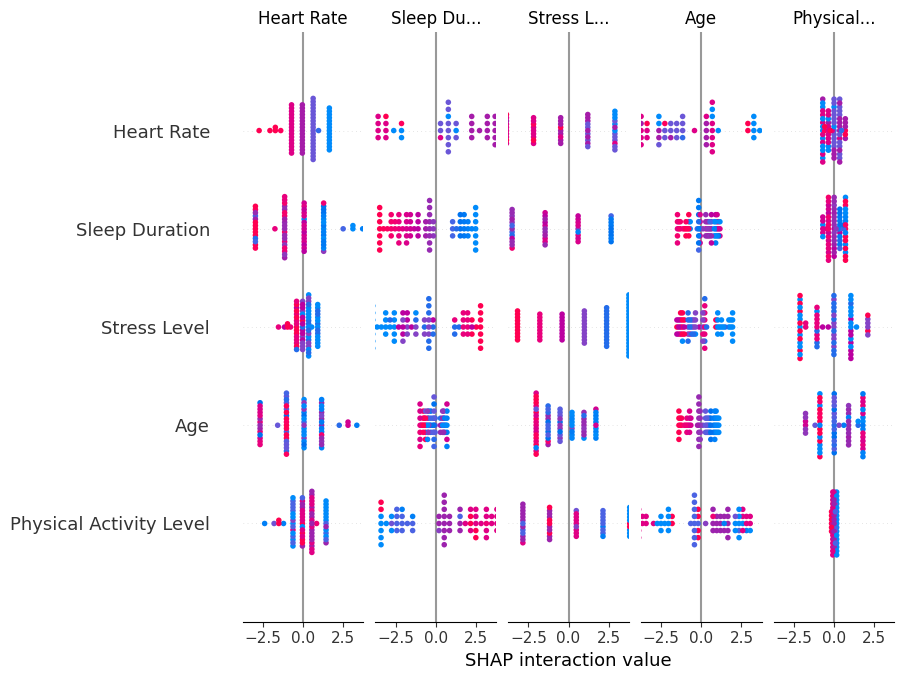

Class 0:


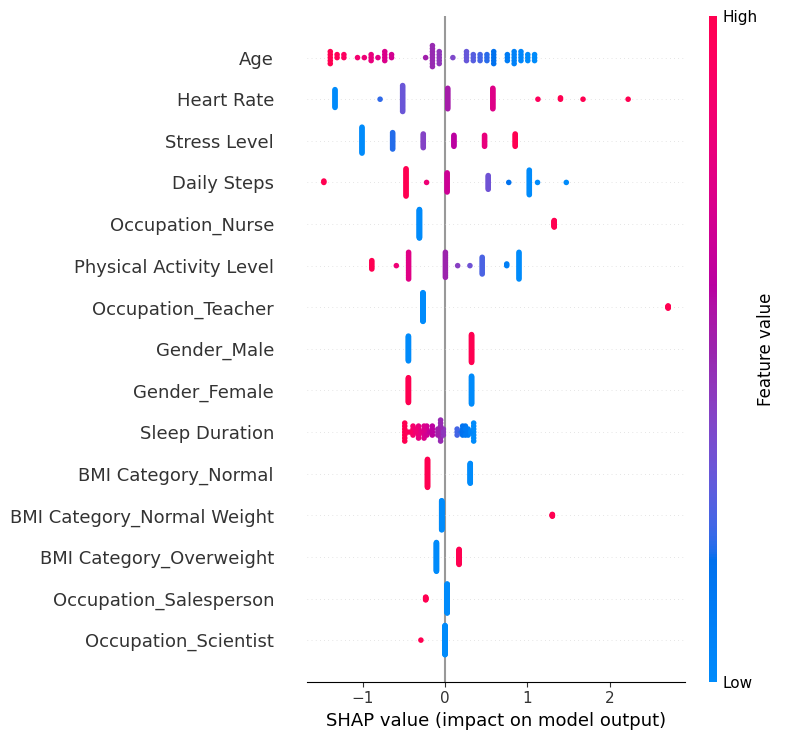

Class 1:


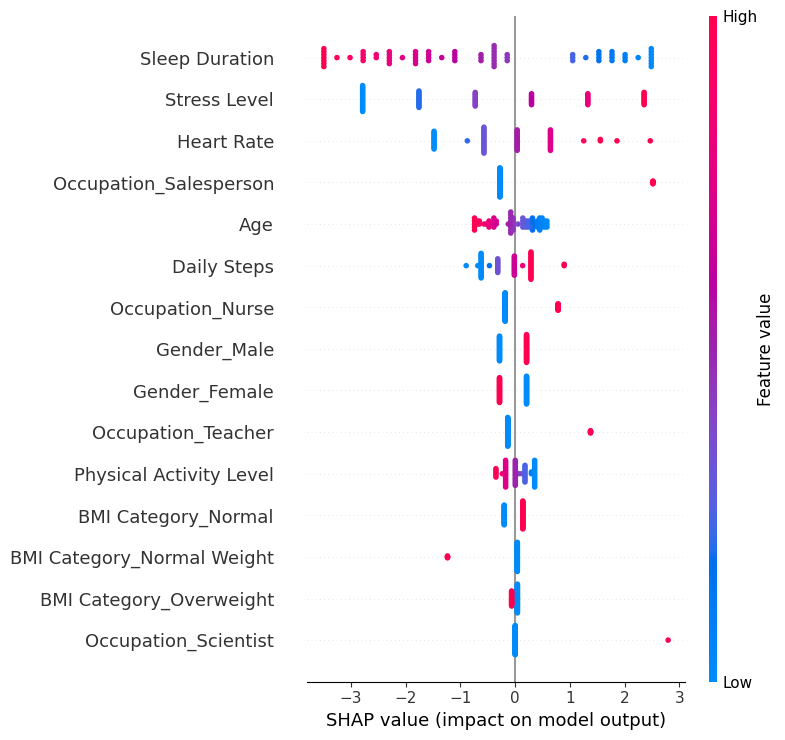

Class 2:


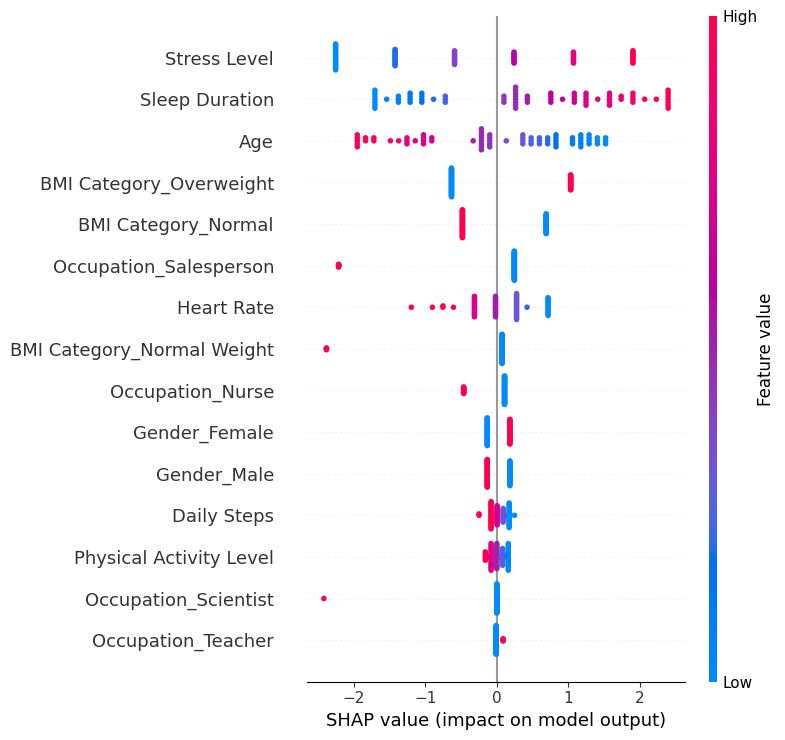

Class 3:


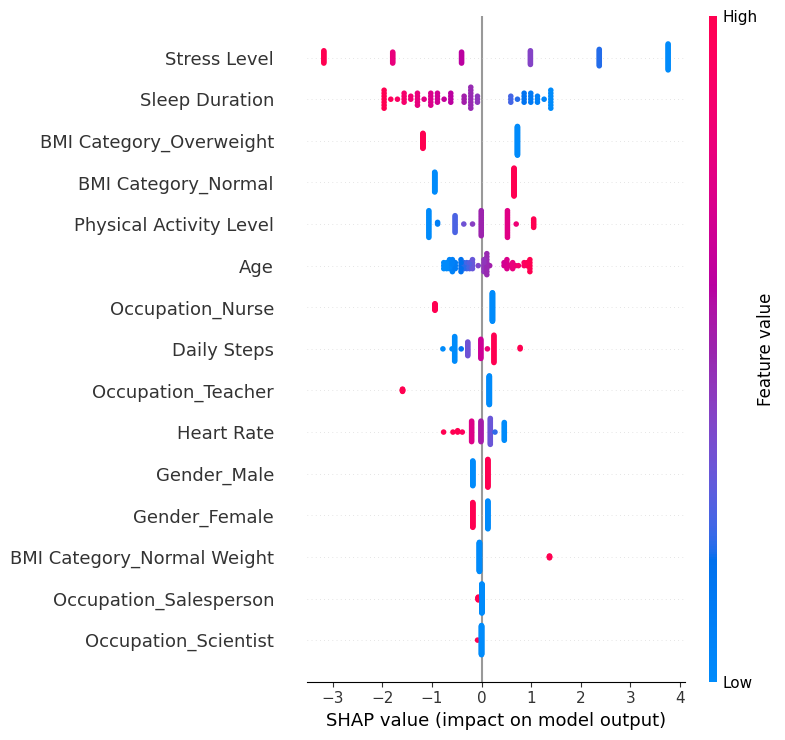

Class 4:


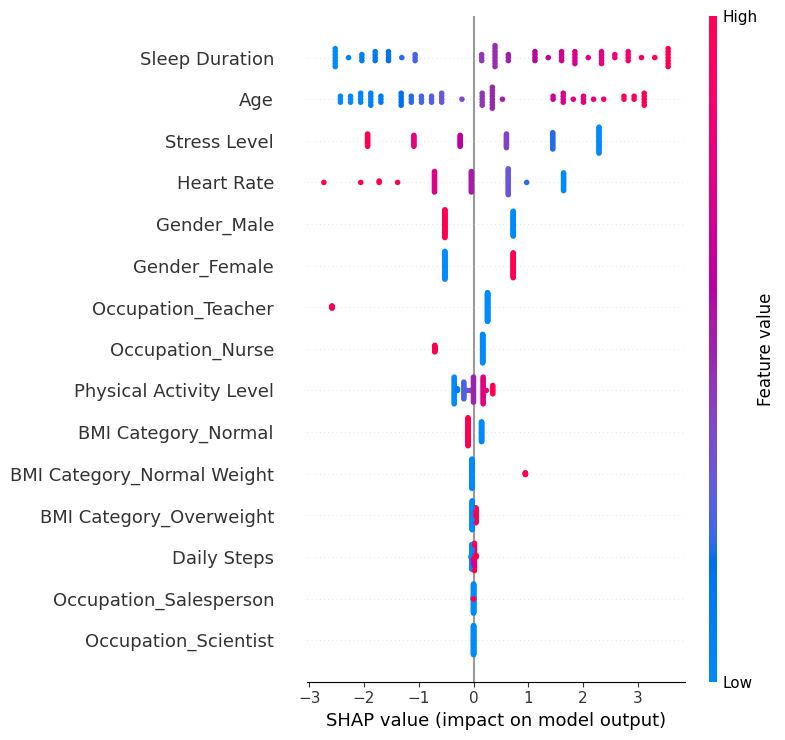

In [ ]:
# Create the SHAP Explainer
explainer = shap.Explainer(logreg_pipeline.named_steps['logisticregression'], logreg_pipeline.named_steps['standardscaler'].transform(X_train))

# Calculate SHAP values
shap_values = explainer(logreg_pipeline.named_steps['standardscaler'].transform(X_test))

print("Shape of SHAP values:", shap_values.values.shape)

# Visualize the SHAP values (summary plot)
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


for class_index in range(logreg_model.classes_.shape[0]):
    print(f"Class {class_index}:")
    shap.summary_plot(shap_values[:, :, class_index], X_test, feature_names=feature_names)

#####SHAP Plot Analysis

**Axis Labels:**
The x-axis shows the SHAP interaction values, which measure the impact of the interaction of a pair of features on the model's prediction. The y-axis lists features in the dataset.

**Dots on the Plot:**
Each dot represents the SHAP interaction value for a specific pair of features for a single prediction. The color of the dot represents the value of the feature from low (in blue) to high (in pink/red). For instance, a red dot far to the right for 'Heart Rate' on the x-axis 'Age' would indicate a high value for 'Heart Rate' that, when combined with 'Age', has a large positive interaction effect on the model's prediction.

**Patterns and Clusters:**

Clusters of dots show how different the interactions are across the data. If many dots are far from the center line (zero), it means that interaction has a strong effect on the prediction. Conversely, if most dots are clustered around the center line, the interaction has little to no effect.

**Comparing Features:**

*Diagonal:*

The diagonal often shows the main SHAP value (effect) of the feature itself (without interaction).

*Off-Diagonal:*

The off-diagonal values show the interaction effects. For example, how 'Heart Rate' and 'Sleep Duration' interact to affect the model's prediction.

**Magnitude and Direction:**

*Positive Values (dots to the right of zero): *

These suggest that the interaction between the pair of features is increasing the model's output. For a binary classification problem, this could mean making a positive class prediction more likely.

*Negative Values (dots to the left of zero):*

These indicate that the interaction between the features is decreasing the model's output, potentially making a negative class prediction more likely.

**Symmetry:**

The plot is symmetric about the diagonal, with the lower triangle mirroring the upper triangle. This is because the interaction between Feature A and Feature B is the same as the interaction between Feature B and Feature A.

**Feature Importance:**
Generally, the further the dots are from the center line (for both positive and negative values), the more important the interaction is. For example, if 'Age' and 'Physical Activity Level' have many dots far from zero, their interaction is very important for the model's predictions.

###Decision Tree Classifier

The decision tree is a series of questions about the features. Answering these questions with the data point's features leads you through a path in the tree to a leaf node that provides a class prediction.
The paths taken in the tree are based on the model's learned thresholds for maximizing class separation, with each node aiming to isolate samples into the purest possible groups in terms of class distribution.

The tree begins with the root node where the first and most significant split is made based on the "Stress Level" feature. This suggests that stress level is a key factor in predicting sleep quality.

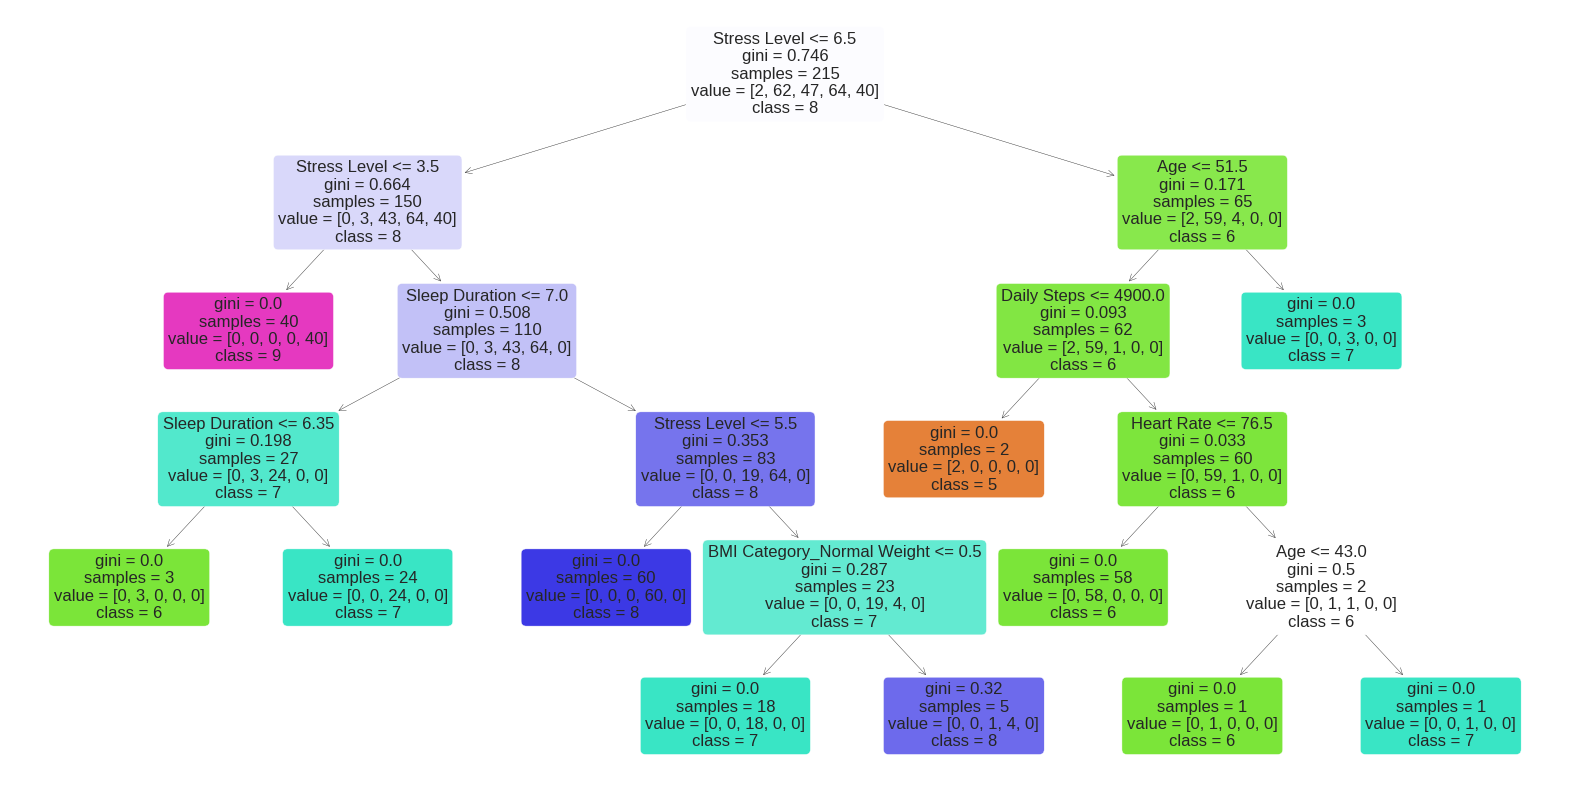

Decision Tree Accuracy: 0.9722222222222222


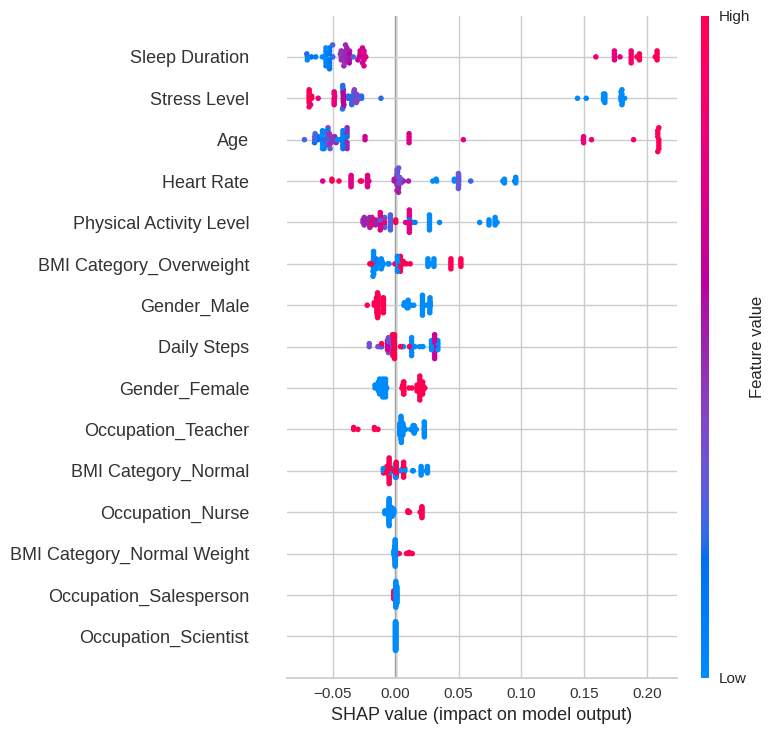

Class 0:


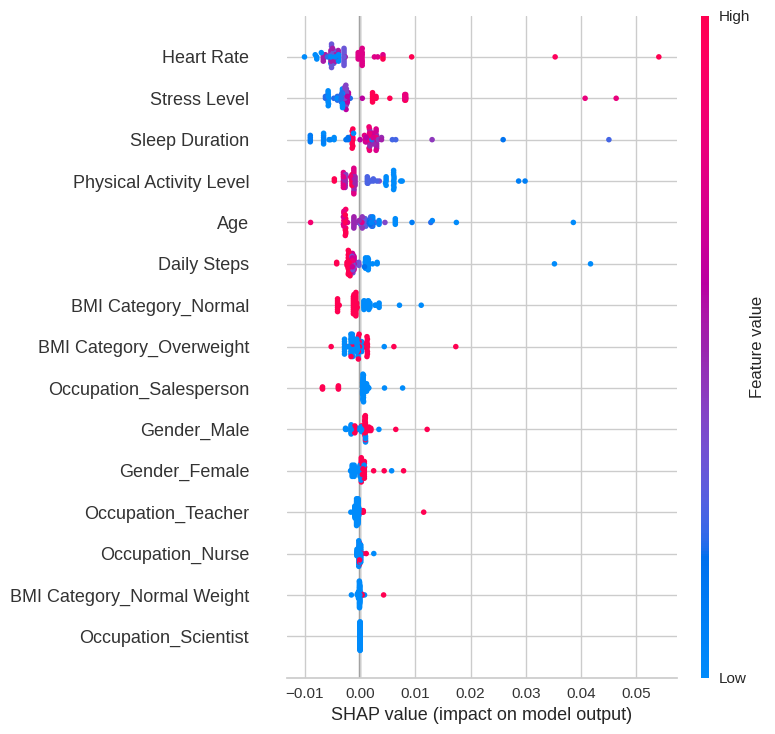

Class 1:


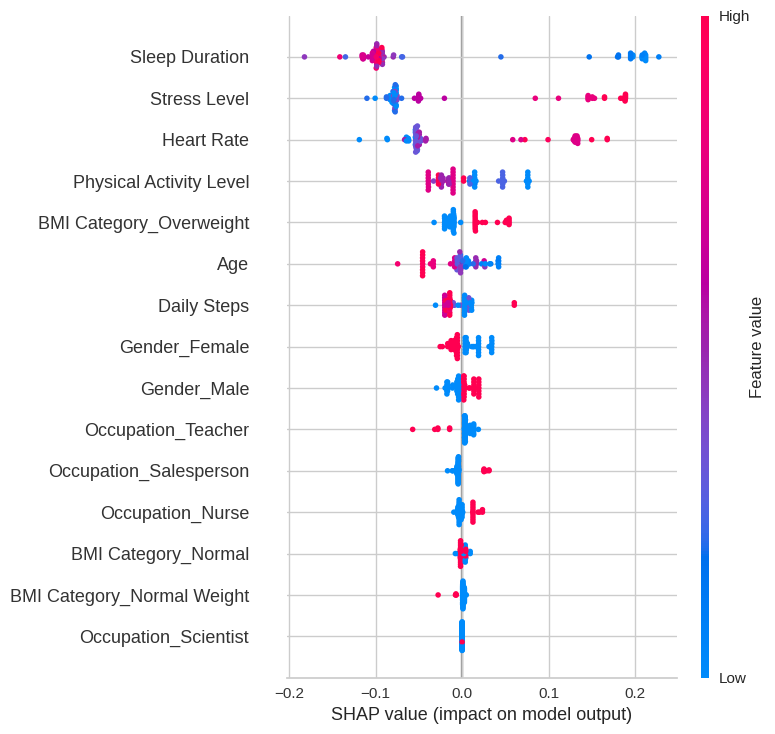

Class 2:


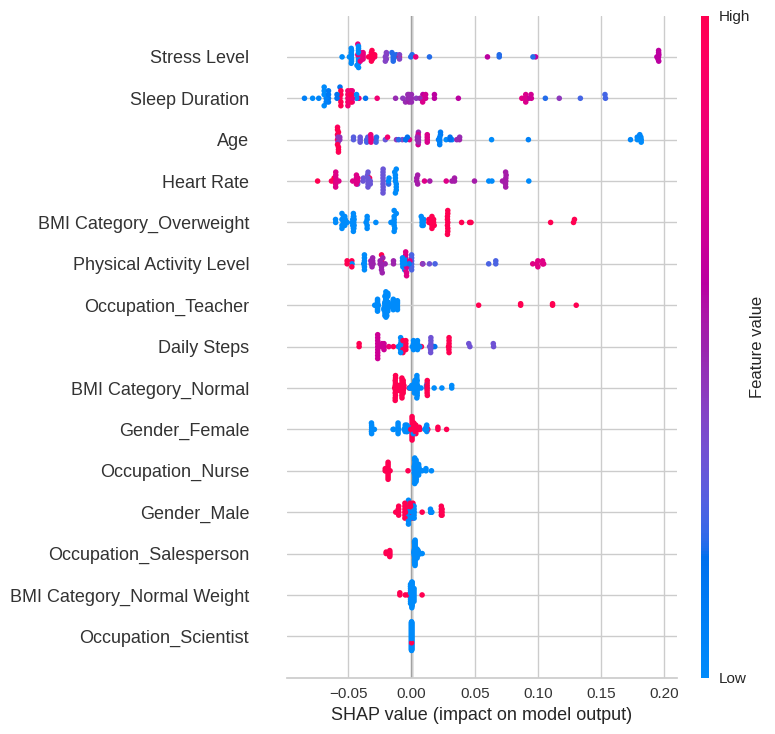

Class 3:


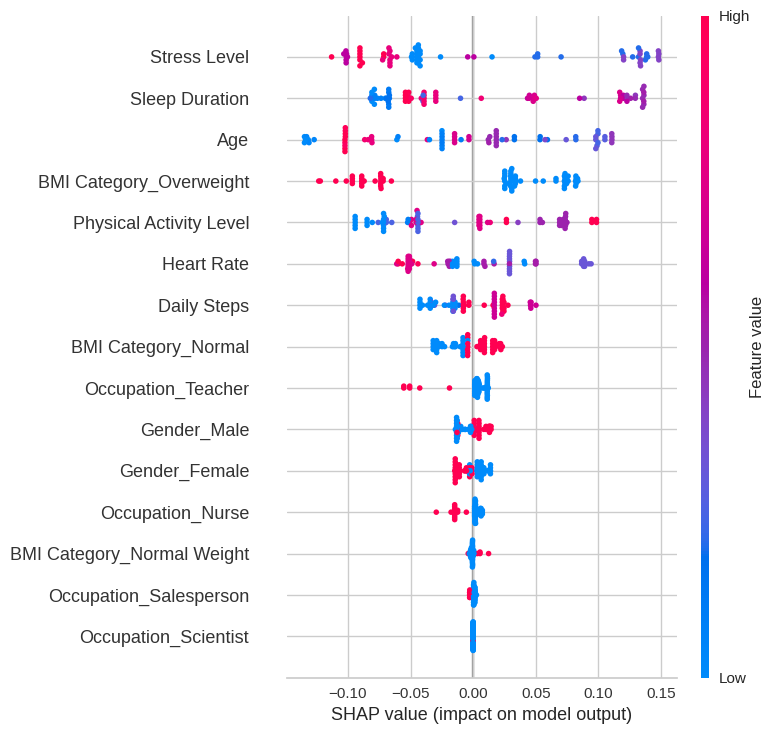

Class 4:


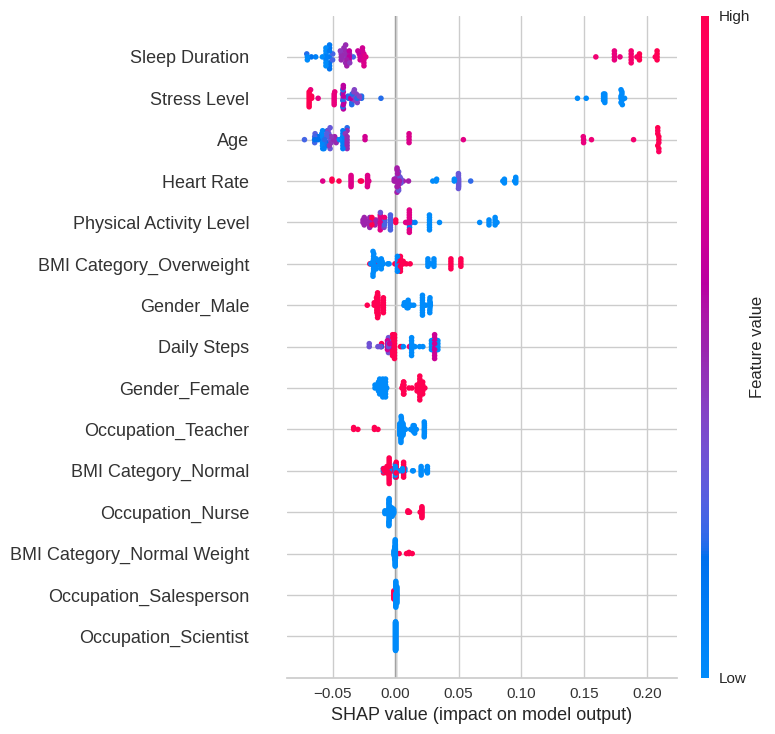

In [328]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limiting tree depth for easier visualization

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=[str(cls) for cls in dt_classifier.classes_], rounded=True, fontsize=12)
plt.show()

# Print the accuracy
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Create a SHAP TreeExplainer for the Decision Tree model
explainer_dt = shap.TreeExplainer(dt_classifier)

# Calculate SHAP values for the test set
shap_values_dt = explainer_dt.shap_values(X_test)

#summary plot for all test instances
shap.summary_plot(shap_values[:, :, class_index], X_test, feature_names=feature_names)

for class_index in range(dt_classifier.classes_.shape[0]):
    print(f"Class {class_index}:")
    shap.summary_plot(shap_values[:, :, class_index], X_test, feature_names=feature_names)

####Interpreting Models Performance


**Root Node:**

The root of the tree splits on Stress Level <= 3.5.
The Gini impurity of this node is 0.664, suggesting that the samples are quite mixed in terms of classes.
There are 150 samples reaching this node, with the distribution of classes given by value = [0, 3, 43, 64, 40].
The majority class at this node is class 8.

**First Level Split:**

On the left, the tree splits into a leaf node. A leaf node is where a prediction is made, indicated by the class with the majority of samples. For instance, one leaf node predicts class 9 because all 40 samples at that node belong to class 9 (Gini = 0.0, indicating purity).
On the right, the tree continues to split based on Stress Level <= 6.5.
Second Level Split:

Following the right branch of the root node, there is a further split based on Age <= 51.5. Each of these branches leads to further splits or leaf nodes, depending on whether the condition is met.
Leaf Nodes:

The leaf nodes are colored and are the endpoints of each branch, where the decision tree makes a final prediction. The value array at each leaf node shows the distribution of class samples at that node. For example, one of the leaf nodes that predict class 6 has a value = [0, 3, 0, 0, 0], meaning there are 3 samples from class 6 and none from the other classes.
Leaf nodes with Gini = 0.0 are pure, meaning all samples at that node are from a single class.

**Further Splits:**

The decision tree keeps splitting based on feature values. For example, one of the branches from the Age <= 51.5 node further splits based on Daily Steps <= 4900.0.
If Daily Steps is less than or equal to 4900, it follows the left node which predicts class 6; otherwise, it continues to split.
Interpreting Splits:

Each split is based on a condition that aims to increase the homogeneity of the nodes.
For example, after splitting on Stress Level <= 6.5, we further refine the samples based on Age <= 51.5. Each of these conditions aims to create more pure nodes, indicated by a lower Gini impurity.

The goal of these splits is to clearly define regions where one class is predominant over the others, making it easier to predict the class of a new sample based on these conditions.

####Random Forest Classifier

Random Forest is an ensemble learning technique that builds multiple decision trees and combines their predictions through voting or averaging.

It improves predictive performance by reducing overfitting and increasing robustness to noise and outliers in the data.

Random Forest is effective for a wide range of tasks and datasets and is less prone to overfitting compared to individual decision trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

# Print the evaluation results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Accuracy: 1.0

Confusion Matrix:
 [[ 2  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0 21  0]
 [ 0  0  0  0 20]]

Classification Report:
               precision    recall  f1-score   support

           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        20

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



#####Interpreting Model Performance

The accuracy is 100%. how do we ensure that the model is not overfitting?

We can introduce validation set - Beyond the train-test split, we can hold out a portion of our dataset as a validation set. This set is used to tune the parameters of the model. The test set is then used to provide an unbiased evaluation of a final model fit on the training dataset.

We can also use regularization techniques where we add penalties on the different parameters of our model to reduce the freedom of the model thereby overfitting. For Random Forests, parameters that control the complexity of the trees, such as max_depth, min_samples_split, and min_samples_leaf, can act as regularization parameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap

# Splitting the dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Initialize the Random Forest classifier with regularization parameters
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, min_samples_leaf=2, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = rf_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# If the model performs well on the validation set, evaluate it on the test set
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

# Print the evaluation results on the test set
print("Test Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Validation Accuracy: 0.9722222222222222
Test Accuracy: 0.9722222222222222

Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0 21  0]
 [ 0  0  0  0 20]]

Classification Report:
               precision    recall  f1-score   support

           5       0.00      0.00      0.00         2
           6       0.90      1.00      0.95        18
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        20

    accuracy                           0.97        72
   macro avg       0.78      0.80      0.79        72
weighted avg       0.95      0.97      0.96        72



The results from our model evaluation after incorporating a validation set and regularization show a high level of accuracy (97.22%) on both the validation and test sets, which is a good indication that our model is generalizing well to unseen data. However, there are still valuable insights to be learned from comparing the detailed metrics between the initial perfect model and the adjusted model. Here's how to interpret the differences:

**Accuracy Decrease:** Your initial model had a perfect accuracy of 1.0, while the adjusted model shows a slightly lower accuracy of 0.972. This slight decrease in accuracy is actually a positive sign in this context. It suggests that by using a validation set and regularization, the model is likely no longer overfitting to the training data as severely as before, leading to more realistic performance metrics.

**Class-Specific Performance:** In the initial model, all classes had a precision, recall, and F1-score of 1.0, indicating perfect classification. In the adjusted model:
The class labeled 5 has a precision and recall of 0.00, indicating that your model failed to correctly predict any instances of this class. This could be due to the small sample size for this class in the training data, making it hard for the model to learn to predict it accurately.
The other classes (6, 7, 8, 9) still show very high performance, with precision and recall at 0.90-1.00. This indicates that the model is still very effective at classifying these classes.

In summary, the adjustments made to our model to prevent overfitting have led to a more realistic evaluation of its performance. While the accuracy remains high, the detailed metrics reveal specific areas where the model could be improved, especially in handling smaller or more difficult-to-distinguish classes.

This nuanced understanding can guide further model refinement, such as gathering more data for underrepresented classes, exploring feature engineering to better distinguish similar classes, or trying different models and hyperparameters.

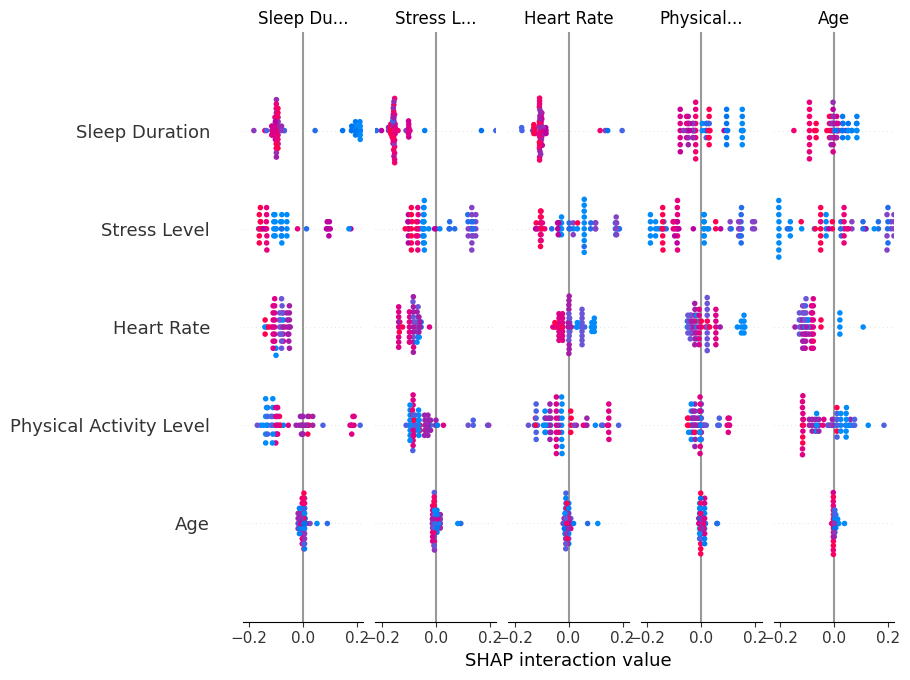

In [ ]:
# Initialize the SHAP Explainer using a tree explainer which is optimized for tree-based models like Random Forest
explainer_rf = shap.TreeExplainer(rf_classifier)

# Calculate SHAP values for the test set
shap_values_rf = explainer_rf.shap_values(X_test)

# Summarize the SHAP values in a plot (e.g., summary plot for all test instances)
shap.summary_plot(shap_values_rf, X_test, feature_names=X_train.columns)

#####SHAP Plot Analysis

The plot shows the SHAP interaction values for different features of a model that predicts "Quality of Sleep."

**Sleep Duration:** This feature appears to have varying interaction effects with other features, as indicated by the spread of dots across the zero line. When interacting with itself, it seems to have a range of both positive and negative effects on the model output.

**Stress Level:** The interactions involving stress level are also spread out, suggesting that its impact on "Quality of Sleep" changes when considered alongside different features. This could mean that the effect of stress on sleep quality is not straightforward and may depend on other factors such as age or physical activity.

**Heart Rate:** The dots for heart rate interactions are dispersed, similar to sleep duration and stress level, implying that its interaction with other features, including itself, can either increase or decrease the prediction of sleep quality. The effect of heart rate on sleep quality prediction can be significantly different depending on the values of heart rate and the features it interacts with.

**Physical Activity Level:** This feature's interactions also show a mix of positive and negative values. However, it's interesting to note the interactions between physical activity level and age; they seem to have a more concentrated cluster of dots, especially in the negative range, indicating a consistent pattern where different levels of physical activity and age combine to influence sleep quality predictions.

**Age:** The interaction effects of age with other features, like stress level and heart rate, appear substantial. The clusters suggest that the predictive importance of age on sleep quality varies with changes in these other factors.
Remember, the color of the dots indicates the value of the feature for that particular data point, with blue being lower and pink being higher. Therefore, you can see that higher or lower values of these features can change the direction and magnitude of their interactions with others, affecting the model's predictions for "Quality of Sleep."


Overall, the plot implies that none of the features act in isolation; instead, their predictive power is contingent upon the interaction with other features. This highlights the complexity of the factors contributing to the quality of sleep as modeled.

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.8 MB/s eta 0:00:00


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
min_mem_size=6
run_time=222

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [ ]:
port_no=random.randint(5555,55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:28364..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp98aq7lar
  JVM stdout: /tmp/tmp98aq7lar/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp98aq7lar/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:28364
Connecting to H2O server at http://127.0.0.1:28364 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_a9z8xy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
url = 'QualityofSleep_cleaned.csv'
df5 = h2o.import_file(url)
df5.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Overweight
27,6.1,6,42,6,77,4200,None,126,83,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
28,6.2,6,60,8,75,10000,None,125,80,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
28,6.2,6,60,8,75,10000,None,125,80,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
29,7.8,7,75,6,70,8000,None,120,80,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
29,7.8,7,75,6,70,8000,None,120,80,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
29,7.8,7,75,6,70,8000,None,120,80,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
29,6.1,6,30,8,70,8000,None,120,80,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
29,7.8,7,75,6,70,8000,None,120,80,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
29,6.1,6,30,8,70,8000,None,120,80,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
29,6,6,30,8,70,8000,None,120,80,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


####AutoML


**Automated Model Selection:** H2O AutoML automates the process of training and tuning many different models. It can systematically work through multiple models and their hyperparameters to find the best performing one for a given dataset.

**Efficiency:** It saves time and resources that you would otherwise spend on manually selecting and tuning different algorithms. H2O AutoML handles these tasks automatically and often more efficiently than a human could.

**Ease of Use:** It lowers the barrier to entry for users by abstracting the complexity involved in choosing the right machine learning algorithms and hyperparameters. This makes it easier for non-experts to apply machine learning to their problems.

**Reproducibility and Consistency:** The process within H2O AutoML is consistent and reproducible. It follows a predefined pipeline, which means that it removes some of the human-induced variability from the model development process.

**Ensemble Learning:** H2O AutoML includes ensemble methods that combine predictions from several models to improve the final prediction accuracy. The ensemble model usually performs better than any single model.

**Pipeline Complexity:** Machine learning pipelines can be complex, involving data pre-processing, feature selection, model training, and post-processing. H2O AutoML automates much of this process.

**Cross-Validation:** It automatically applies cross-validation, ensuring that the model’s performance is robust and not just a result of overfitting to a particular train-test split.

**Range of Applications:** H2O AutoML can handle classification, regression, and time series problems, providing a one-stop-shop for many types of predictive modeling tasks.

**Scalability:** H2O is designed to be scalable and can handle large datasets efficiently. It can also be deployed in a distributed environment to further enhance its performance.

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 51 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_vwcc6g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.018 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:56:29.729: _train param, Dropping bad and constant columns: [Occupation_Manager]
00:56:36.61: _train param, Dropping bad and constant columns: [Occupation_Manager]
00:56:36.369: _train param, Dropping bad and constant columns: [Occupation_Manager]
00:56:36.956: _train param, Dropping unused columns: [Occupation_Manager]
00:56:37.116: _train param, Dropping bad and constant columns: [Occupation_Manager]
00:56:41.848: _train param, Dropping bad and constant columns: [Occupation_Manager]
00:56:42.257: _train param, Dropping bad and constant columns: [Occupation_Manager]
00:56:44.284: _train param, Dropping bad and constant columns: [Occupation_Manager]
00:56:46.996: _train param, Dropping bad and constant columns: [Occupation_Manager]
00:56:51.344: _train param, Dropping unused columns: [Occupation_Manager]
00:56:51.707: _train param, Dropping unused columns: [Occupation_Ma

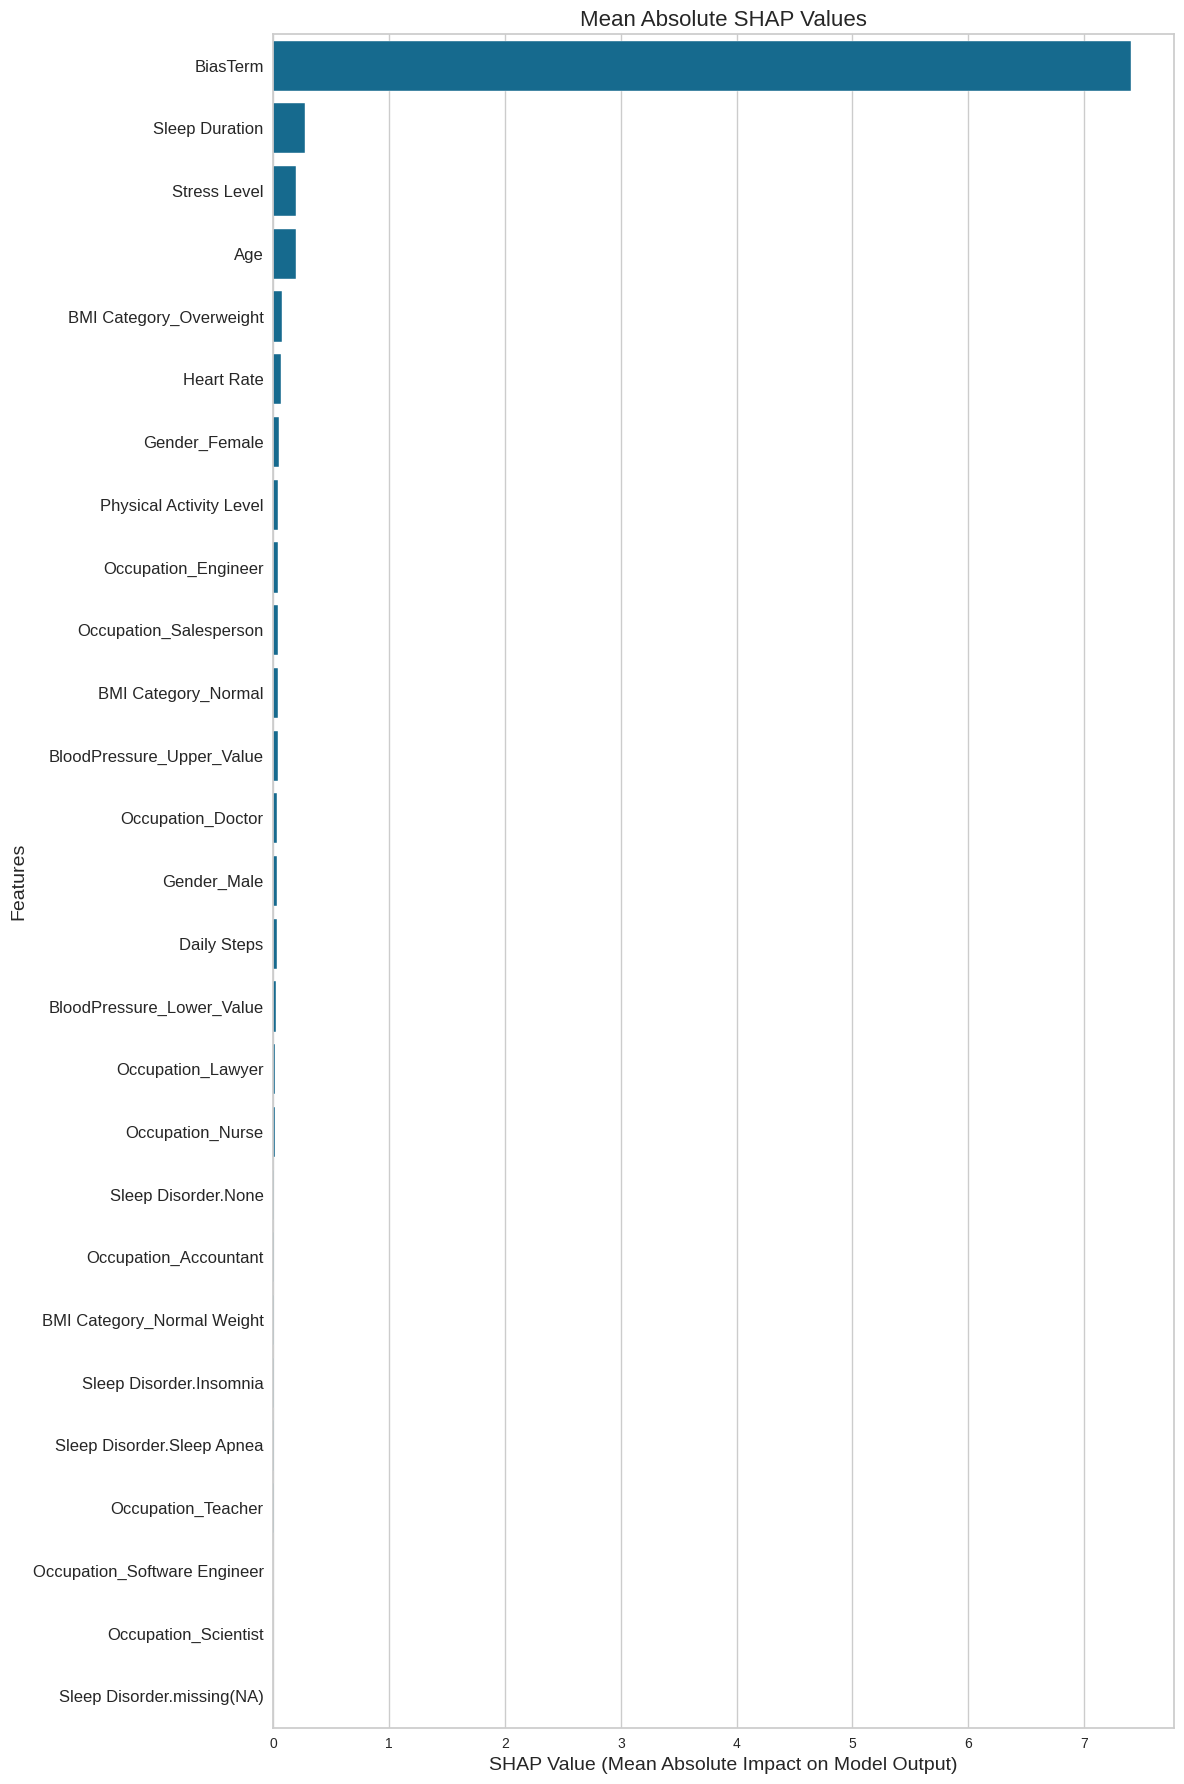

In [325]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the H2O cluster
h2o.init()

# Convert the pandas DataFrame to an H2O Frame
hf = h2o.H2OFrame(df3)

# Split the data into training and testing sets
train, test = hf.split_frame(ratios=[0.8], seed=1234)

# Specify the target and predictors
target = 'Quality of Sleep'
predictors = hf.columns
predictors.remove(target)

# Run H2O AutoML
aml = H2OAutoML(max_runtime_secs=300, seed=1, project_name="Classification", nfolds=5)
aml.train(x=predictors, y=target, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb)

# The leader model is the model with the best performance on the leaderboard
leader_model = aml.leader

# Make predictions on the test set
predictions = leader_model.predict(test)

# Retrieve the model performance on training data
train_performance = leader_model.model_performance(train)

# Retrieve the model performance on cross-validated data
cv_performance = leader_model.model_performance(xval=True)  # Cross-validated performance

# Retrieve the model performance on test data
test_performance = leader_model.model_performance(test)

# Display the performance metrics
print("\nTraining Data Metrics:")
print(train_performance)

print("\nCross-Validation Data Metrics:")
print(cv_performance)

print("\nTest Data Metrics:")
print(test_performance)

# Calculate SHAP values with the background frame
shap_values_h2o = leader_model.predict_contributions(test, background_frame=background_frame)

# Convert the H2O Frame with SHAP values to a pandas DataFrame for easier manipulation
shap_values_df = h2o.as_list(shap_values_h2o)

# Drop the column for the model prediction if present (typically named 'predict' or similar)
if 'predict' in shap_values_df.columns:
    shap_values_df = shap_values_df.drop(['predict'], axis=1)

# Calculate the mean absolute SHAP value for each feature
mean_abs_shap_values = shap_values_df.abs().mean().sort_values(ascending=False)

plt.figure(figsize=(12, 18))  # Increase the figure size for better clarity
sns.barplot(x=mean_abs_shap_values.values, y=mean_abs_shap_values.index)
plt.title('Mean Absolute SHAP Values', fontsize=16)
plt.xlabel('SHAP Value (Mean Absolute Impact on Model Output)', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Rotate the feature names for better readability
plt.yticks(rotation=0, fontsize=12)  # Keep the feature names horizontal or adjust as needed

# Adjust the layout and show the plot with adjustments
plt.tight_layout()
plt.show()

####Interpreting Model Performance

From the AutoML model above we can understand that the best model is Stacked Ensemble.

The StackedEnsemble_BestOfFamily_4_AutoML_6_20240403_05629 model stands out with the lowest RMSE (0.0702583) and MSE (0.00493622), indicating it has the highest accuracy among the models listed for predicting the target variable. Its MAE (0.0227788) and RMSLE (0.00896121) are also competitive, suggesting good precision and reliability in prediction across various magnitudes of the target variable.

When selecting a model for deployment, considering both the accuracy metrics (RMSE, MSE) and the error distribution metrics (MAE, RMSLE) is crucial. The choice might depend on the specific requirements of the application, such as whether absolute errors are more critical than proportional errors, or vice versa.

#####Training Data Metrics

**MSE (Mean Squared Error):** Represents the average of the squares of the errors between what the model predicts and the actual values. A lower MSE indicates better performance. Your model's extremely low MSE (5.28e-05) suggests an excellent fit on the training data.

**RMSE (Root Mean Squared Error):** The square root of MSE provides an estimate of the average distance between the predicted values and the actual values. Like MSE, a lower value indicates a better fit. The RMSE of 0.00727 indicates high accuracy on the training data.

**MAE (Mean Absolute Error):** The average absolute error of the predictions. A lower MAE suggests better accuracy, and your model’s MAE of 0.00576 reflects high precision.

RMSLE (Root Mean Squared Logarithmic Error): Measures the ratio between the actual and predicted values. A lower RMSLE indicates better fit, especially in handling large errors. Your model's RMSLE of 0.000837 suggests it handles ratios well.

**R^2 (R-squared):** Indicates the proportion of variance in the dependent variable that is predictable from the independent variables. An R^2 close to 1 indicates excellent model performance. Your R^2 of 0.99996 is exceptionally high, suggesting nearly perfect predictability.

#####Cross-Validation Data Metrics

Cross-validation metrics are similar in interpretation to training metrics but are applied to multiple subsets of the data to validate the model’s performance more robustly. These metrics generally offer a more reliable estimate of how well the model is expected to perform on unseen data.

The MSE, RMSE, MAE, and RMSLE are all higher in cross-validation than in training, which is expected as the model is now being tested on unseen subsets of the data. However, they are still quite low, indicating good model performance.

The R^2 of 0.99615 on cross-validation data still indicates a high level of predictability, though slightly lower than the training data, suggesting the model generalizes well but with a slight decrease when faced with new data.



#####Test Data Metrics

Test data metrics provide the most accurate representation of how well the model is expected to perform in the real world, as these data points have not been used in training or cross-validation.

The MSE, RMSE, MAE, and RMSLE on test data are significantly higher than those on training and cross-validation, indicating that the model does not perform as well on the test set. This reduction is expected and justified when considering model generalization. It indicates the model, despite its high performance on training and cross-validation data, faces challenges in perfectly predicting new, unseen data, a common scenario in machine learning models striving for generalization.

The R^2 value of 0.96653, although lower than training and cross-validation, is still quite high, indicating the model can predict a significant portion of the variance in the test set, despite the increase in error metrics.


Our model shows excellent performance on the training and cross-validation sets, with a slight decrease in performance on the test set. This decrease could suggest the model is overfitting to the training data or that there are significant differences between the training/cross-validation data and the test data. The high R^2 values across all datasets suggest the model is robust and predicts well, but attention should be paid to the higher error metrics on the test set to improve model generalization.

#####SHAP Plot Analysis

**Bias Term:** This has the highest bar and is likely representing the baseline value to which the SHAP values of other features are added or subtracted. The bias term typically accounts for the average prediction of the model when no other features are taken into account.

**Sleep Duration:** It appears to be the next most important feature after the bias term. A higher SHAP value for sleep duration indicates that it has a strong impact on the model's predictions. The longer or shorter the sleep duration, the more it influences the model's output.

**Stress Level:** This feature also shows significant importance, meaning changes in stress levels have a notable effect on the model's predictions. It suggests that stress level is a key factor in determining the outcome the model is trying to predict, which in the context of your project is likely sleep quality.

**Age:** Age has a moderate impact on the model's prediction. It is not as impactful as sleep duration or stress level but still plays a significant role.

**Other Features:** Features like BMI category (Overweight), heart rate, and gender (female) have smaller but non-negligible effects on the model's predictions. Physical activity level and occupations (Engineer, Salesperson) seem to have the least impact among the listed features.

**Feature Importance Hierarchy:** The descending order of the bars suggests a hierarchy of feature importance, with features at the top having the greatest impact on model predictions and those at the bottom having the least.

**Model Interpretability:** This plot can help in making the model more interpretable by indicating which features are most important for prediction. For example, stakeholders looking to improve sleep quality might focus on modifying sleep duration and managing stress, as these are the top features affecting sleep quality predictions.

From this SHAP plot, we can conclude that while many features contribute to the model's predictions, some have a more substantial impact than others. This can be crucial for decision-making and for understanding the underlying patterns in the data.

##Shapley Additive Explanations

**Consistency:** SHAP values are consistent when comparing models. If a model changes so that the marginal contribution of a feature increases or remains the same, its corresponding SHAP value also increases or remains unchanged.

**Local and Global Interpretation:** SHAP offers explanations both at an individual prediction level (local interpretability) and aggregated across the dataset (global interpretability), which is not inherently available in logistic regression or decision trees.

**Feature Interaction:** SHAP inherently takes into account the interactions between features, offering a more nuanced understanding of feature contributions. Decision trees also capture interactions, but logistic regression does not without explicitly adding interaction terms.

Based on Shapley values, SHAP ensures a fair distribution of contribution across features, reflecting each feature’s proportional impact on the prediction.

#Q4 - What did we learn?



Our project took us on an exciting journey through the world of machine learning to better understand sleep quality. We started with logistic regression, which gave us a good start with an accuracy score of 0.90. Wanting to do even better, we used a technique called cross-validation with logistic regression, which made our accuracy go up. We tried another method called random forest. At first, we got a perfect score of 100%, but we knew that was too good to be true. So, we made some adjustments, like adding rules such as regularization and a validation set, which brought our accuracy to a more believable 0.972.

Our adventure continued as we explored lots of different models quickly with H2O AutoML. This helped us find the best model, which was a stack of different models working together. This part was really helpful because it saved us time and showed us the best model to use without us having to guess.

To really understand what our models were doing, we looked at the math behind them like the coefficients, checked how much they could be off using error metrics, and used special plots called SHAP values. These SHAP plots were great because they showed us which variables were really affecting sleep quality across all the different models we tried.

Our models did a great job overall. They were really good at telling apart different levels of sleep quality, as shown by our scores for accuracy, precision, and recall. Even though we ran into some trouble when we didn’t have enough data or the data was uneven, we managed to work through these issues by tweaking our models.

Our exploration taught us that there's always a balance to strike between how well a model guesses and how easily we can understand why it made those guesses. AutoML might have been our star performer, but figuring out why it made certain decisions was harder than with simpler models like decision trees, which laid everything out in an easy-to-follow way. Logistic regression offered a middle ground, giving us detailed insights at the cost of a bit more complexity. Ultimately, picking the right model depends on what's more important for our needs: making the best guesses or understanding the journey to those guesses clearly. Stress level's consistent importance across models also reminds us of its significant impact on sleep quality, reinforcing its value in any discussion or intervention related to improving sleep. We’ve laid a strong foundation for more studies in the future, which could lead to ways to help people sleep better.



#Conclusion
Our exploration into the predictive modeling of sleep quality has been both enlightening and challenging. Through a combination of logistic regression, random forest, and advanced AutoML techniques, we achieved notable success in accurately classifying sleep quality levels. Our use of SHAP values and other interpretative tools provided deep insights into the influence of various predictors, particularly highlighting the pivotal role of stress levels across different models. Despite encountering data-related limitations, our adaptive strategies enabled us to maintain robust model performance. This journey has underscored the critical trade-offs between predictive accuracy and model interpretability, revealing the nuanced decision-making required in selecting the most appropriate modeling approach. The consistent significance of stress levels across methodologies suggests a universal impact on sleep quality, warranting further investigation and potential intervention strategies.

Our project demonstrates the profound learning potential when applying machine learning techniques to tackle real-world challenges. It highlights the crucial balance we achieved between developing high-performing models, ensuring their decisions are understandable, and uncovering valuable new insights. Through this endeavor, we not only advanced our understanding of sleep quality factors but also refined our approach to model selection and interpretation, paving the way for future research and practical applications. This experience underscores the transformative power of machine learning in deriving meaningful conclusions from complex data, guiding us toward more informed decisions and strategies.

#References

W3schools

H2o ai documentation

aiskunk samples

Book: An Introduction to Statistical Learning with Applications in R
by Gareth James, Daniela Wittten, Trevor Hastie, Robert Tibshirani


#License

MIT License

Copyright (c) 2024 Divi1393

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.